<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/GP4-MIocardial_infarctions_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, We want to build and compare interpretable machine learning methods for predicting complications of myocardial infarction (i.e., heart attack).

One of the main goals of this study is to present decision-makers some insights over what features are critical in predicting complications .



In [ ]:
#import libraries
import random
from collections import Counter
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import isnan
from numpy import mean
from numpy import std
from numpy import loadtxt
from numpy import sort
from matplotlib import pyplot
import matplotlib.pyplot as plt
import graphviz
from graphviz import Digraph
from sklearn import tree
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as skl_lm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/Myocardial infarction complications.csv", header=0, na_values='?')  #MI--> MIOCARDIAL INFARCTION

Summary Statistics

In [ ]:
df.shape

(1700, 124)

In [ ]:
print(df.head())

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1700.0,850.500000,490.892045,1.0,425.75,850.5,1275.25,1700.0
AGE,1692.0,61.856974,11.259936,26.0,54.00,63.0,70.00,92.0
SEX,1700.0,0.626471,0.483883,0.0,0.00,1.0,1.00,1.0
INF_ANAM,1696.0,0.554835,0.836801,0.0,0.00,0.0,1.00,3.0
STENOK_AN,1594.0,2.316186,2.440586,0.0,0.00,1.0,5.00,6.0
...,...,...,...,...,...,...,...,...
DRESSLER,1700.0,0.044118,0.205417,0.0,0.00,0.0,0.00,1.0
ZSN,1700.0,0.231765,0.422084,0.0,0.00,0.0,0.00,1.0
REC_IM,1700.0,0.093529,0.291259,0.0,0.00,0.0,0.00,1.0
P_IM_STEN,1700.0,0.087059,0.282004,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [ ]:
df.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [ ]:
df= df.drop('ID',axis=1)
df.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


Data Pre-processing

Handling Missing Data

First, We delete rows and columns where more than 30% of the data are missing.As a result, 7 columns and 24rows are deleted.

In [ ]:
# missing values per column (# selected column threshold: 30%)
column_list = []
for i in range(df.shape[1]):
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    if perc >= 30:
        column_list.append(i)

In [ ]:
# drop rows with missing values
df_col_name = df.columns
df_col_name_delete= df_col_name[column_list]
df.drop(df_col_name_delete, axis=1, inplace=True)

In [ ]:
(df.shape)

(1700, 116)

In [ ]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.corr()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
AGE,1.000000,-0.394250,0.098238,0.232969,0.198185,0.103516,0.235737,-0.023907,0.292543,0.131705,...,-0.030707,-0.034525,0.042854,0.104677,0.124476,-0.077619,0.146107,0.091002,-0.018823,0.157821
SEX,-0.394250,1.000000,0.040448,-0.094112,-0.107890,-0.074199,-0.255958,-0.065747,-0.345897,-0.105564,...,0.044560,0.027478,0.008722,-0.065186,-0.075090,0.035616,-0.097490,-0.065186,-0.016035,-0.086326
INF_ANAM,0.098238,0.040448,1.000000,0.330549,0.333040,0.211958,0.101402,-0.015993,0.131337,0.167982,...,-0.072268,-0.020687,-0.018090,0.093776,-0.068089,-0.051955,0.017349,0.039614,0.047162,0.071421
STENOK_AN,0.232969,-0.094112,0.330549,1.000000,0.763019,0.332914,0.133783,-0.021259,0.218586,0.103871,...,-0.030223,0.004930,0.011505,0.106782,0.031259,-0.061681,0.014204,0.135158,0.082838,0.115921
FK_STENOK,0.198185,-0.107890,0.333040,0.763019,1.000000,0.385149,0.117894,-0.000908,0.165775,0.139666,...,-0.027057,0.013182,-0.023365,0.120892,-0.011172,-0.062212,0.005511,0.096390,0.104533,0.070682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DRESSLER,-0.077619,0.035616,-0.051955,-0.061681,-0.062212,-0.061571,-0.064639,0.023450,-0.040980,-0.055657,...,0.039620,0.012424,-0.024103,-0.000145,-0.022579,1.000000,0.058501,0.009693,-0.025700,-0.053456
ZSN,0.146107,-0.097490,0.017349,0.014204,0.005511,0.013347,0.041740,-0.001857,0.034533,0.169750,...,0.011369,-0.010141,-0.001631,0.125196,-0.067689,0.058501,1.000000,0.086894,-0.045993,-0.038309
REC_IM,0.091002,-0.065186,0.039614,0.135158,0.096390,0.078051,0.017631,0.007225,0.054333,-0.005717,...,0.052993,0.044024,0.007506,0.174350,-0.023622,0.009693,0.086894,1.000000,0.029793,0.098199
P_IM_STEN,-0.018823,-0.016035,0.047162,0.082838,0.104533,0.076040,-0.013846,-0.011430,0.038725,-0.053165,...,-0.035708,-0.043609,-0.057518,-0.070530,-0.055933,-0.025700,-0.045993,0.029793,1.000000,-0.096070


In [ ]:
# drop rows with missing values
dataframe_col_name = df.columns
dataframe_col_name_delete= dataframe_col_name[column_list]
df.drop(dataframe_col_name_delete, axis=1, inplace=True)

In [ ]:
df.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,0.0,7.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=109)

Univariate plots

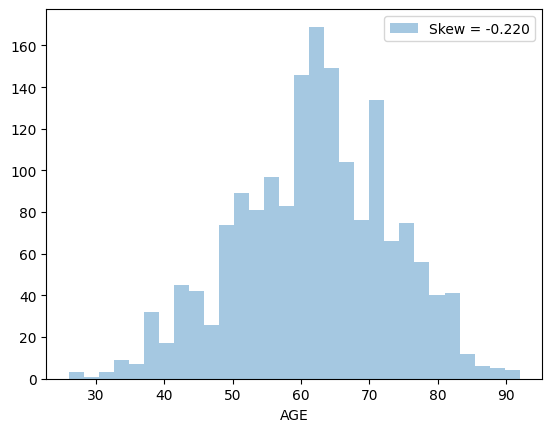

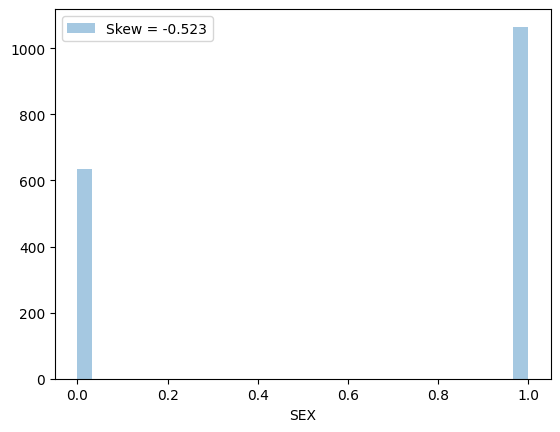

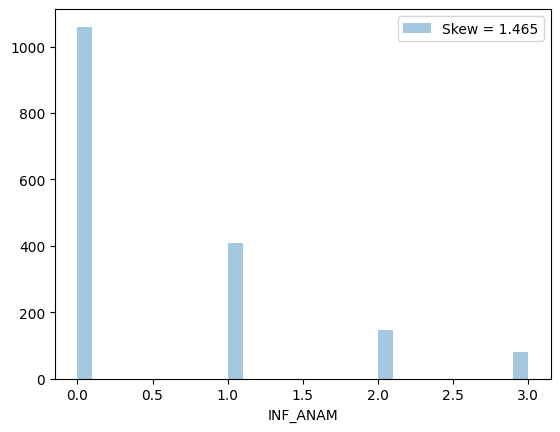

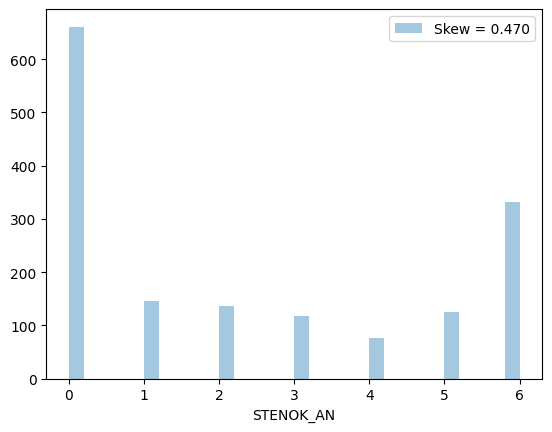

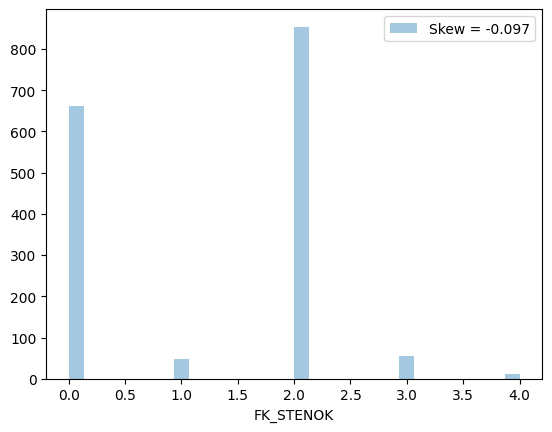

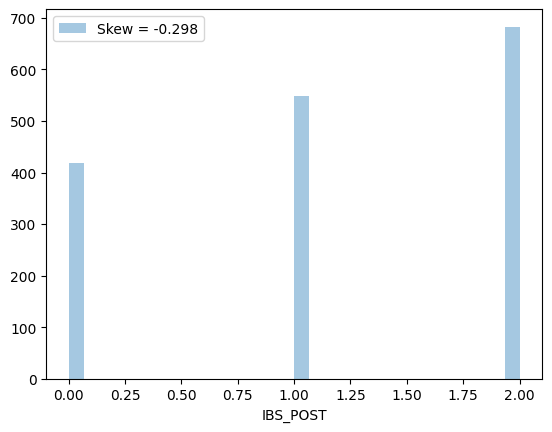

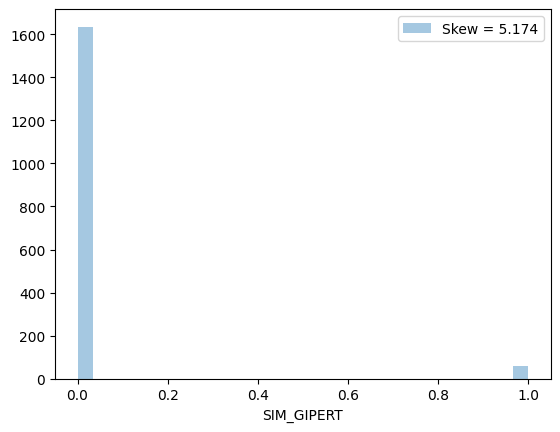

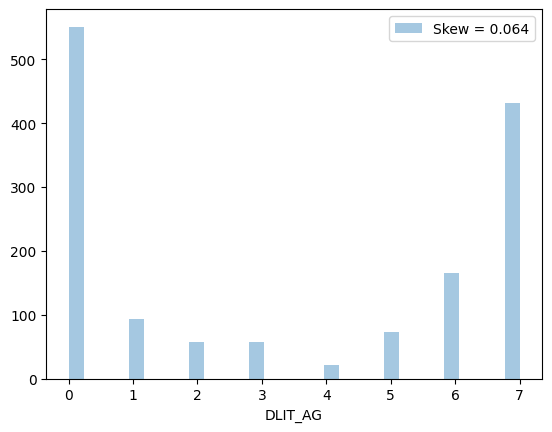

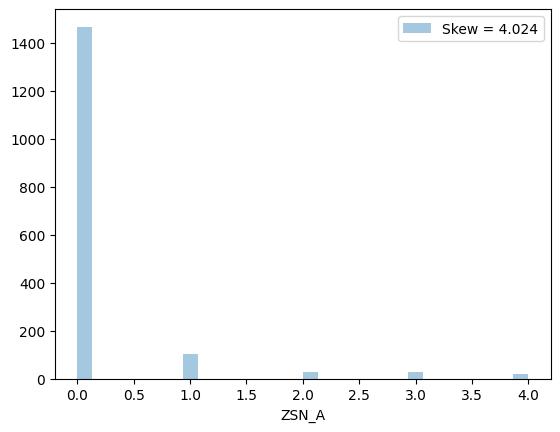

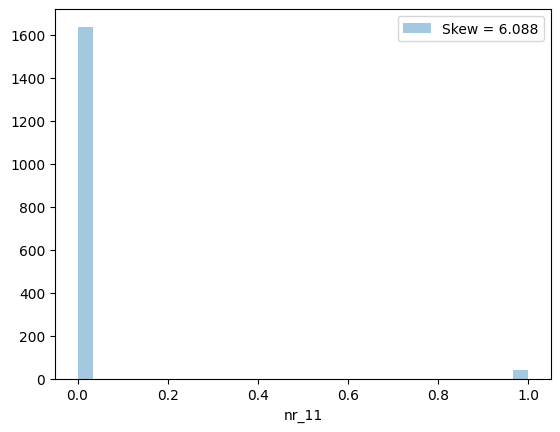

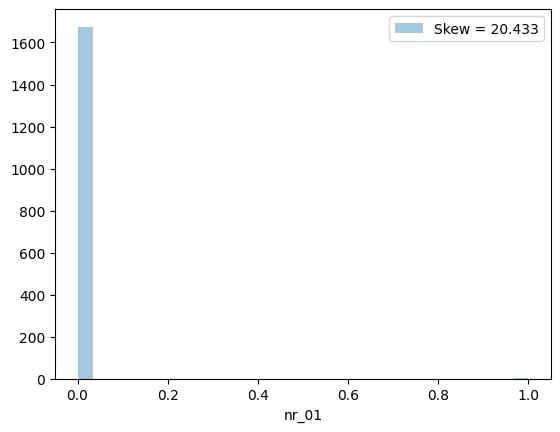

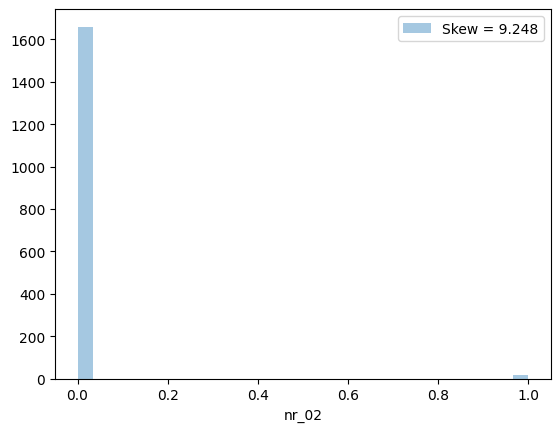

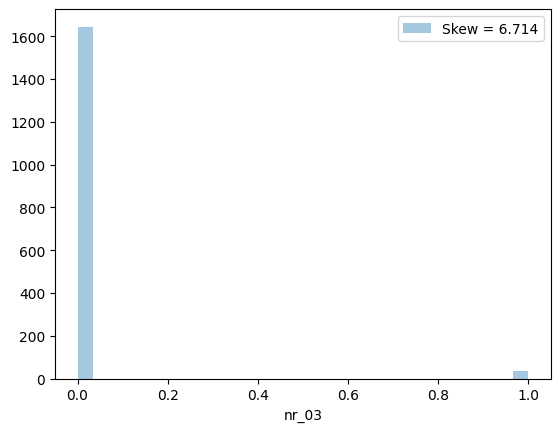

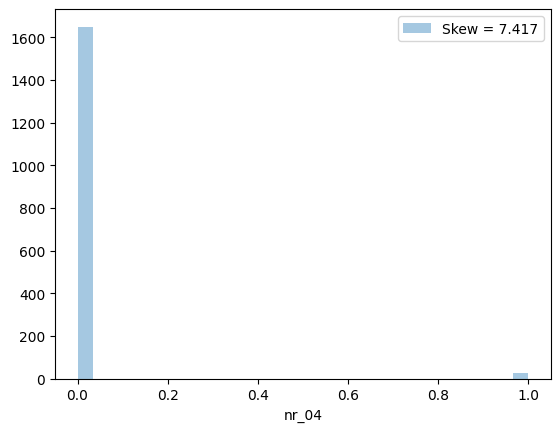

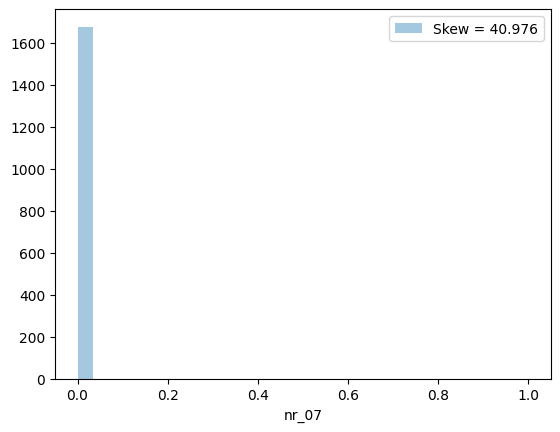

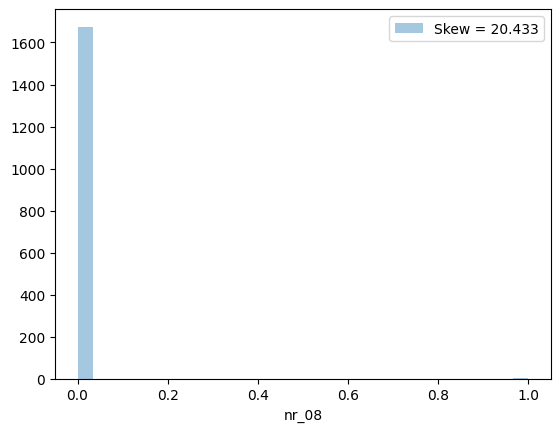

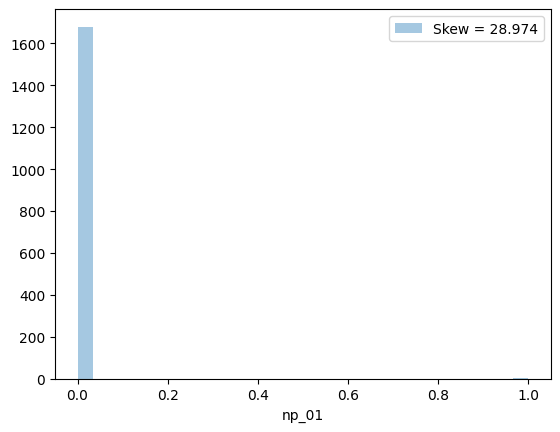

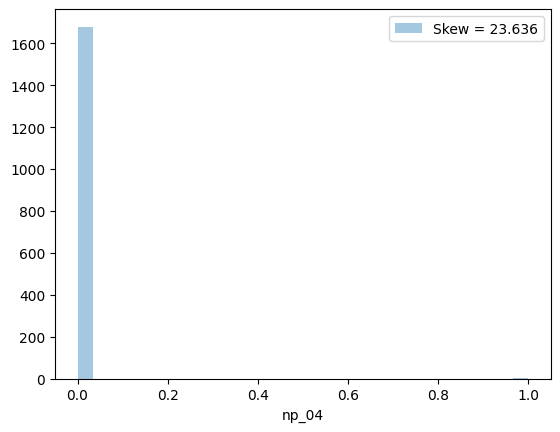

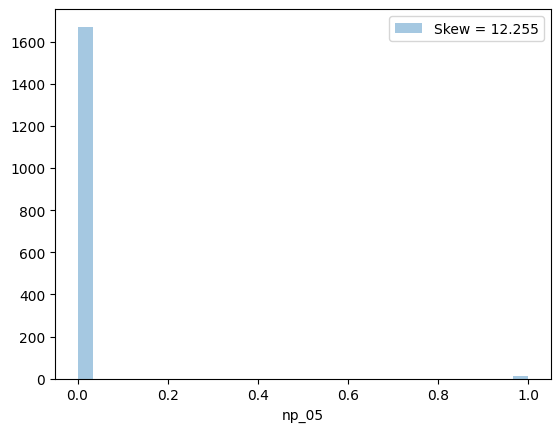

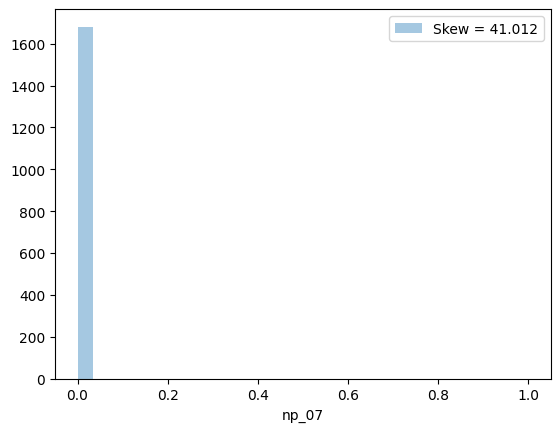

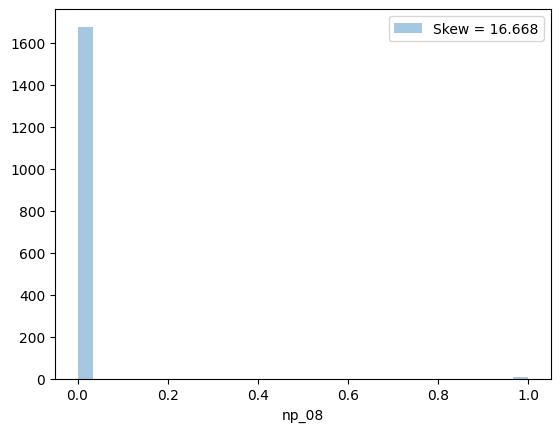

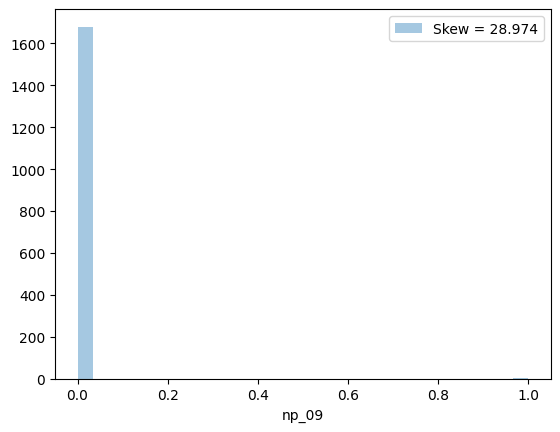

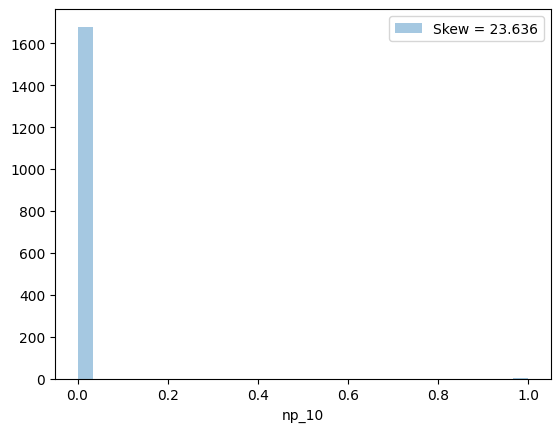

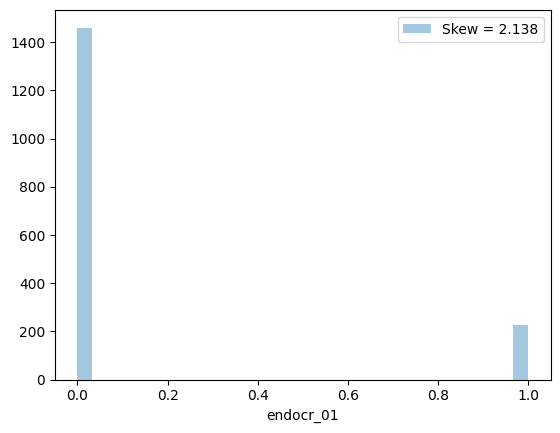

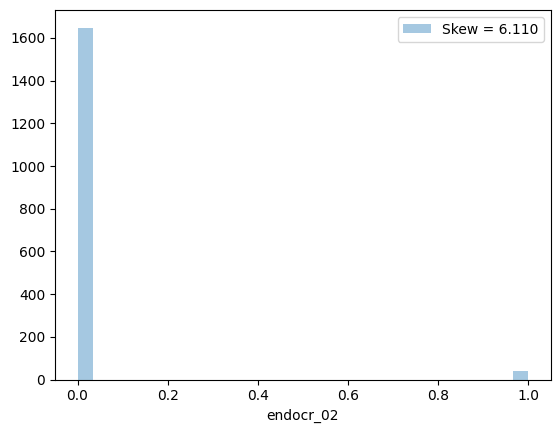

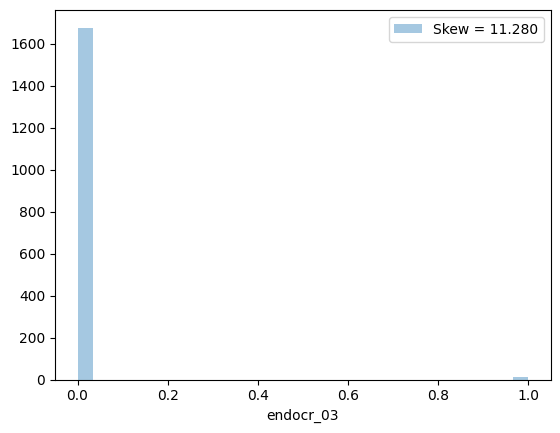

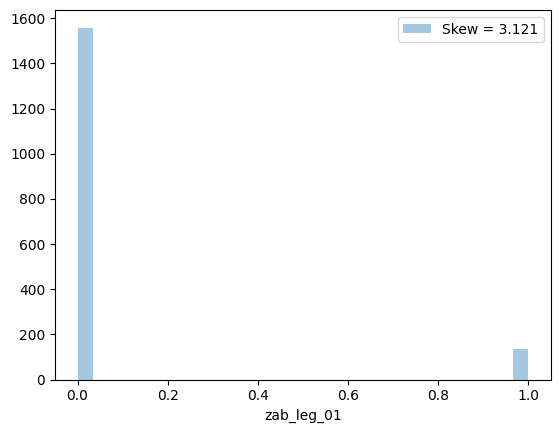

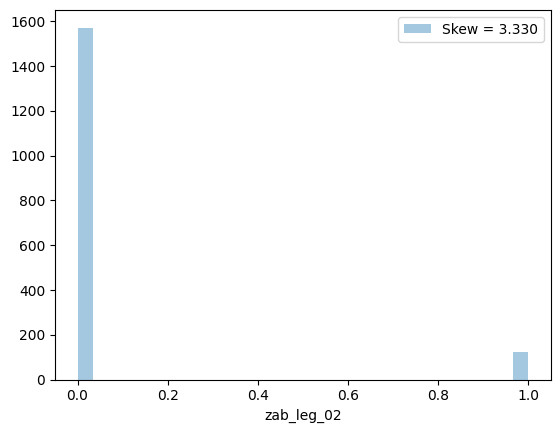

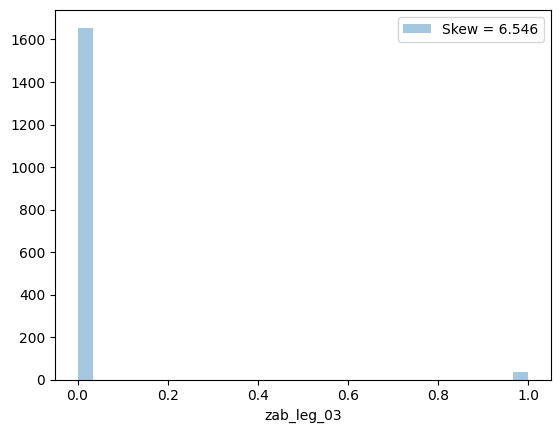

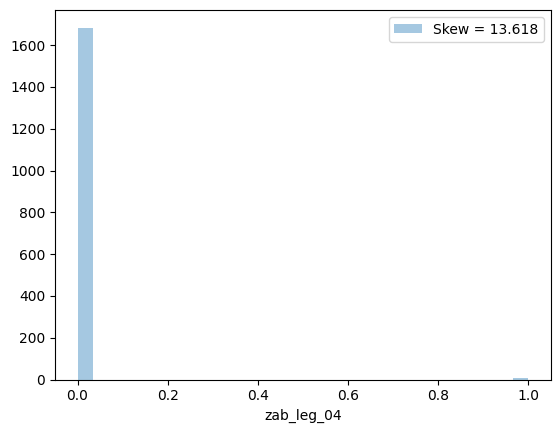

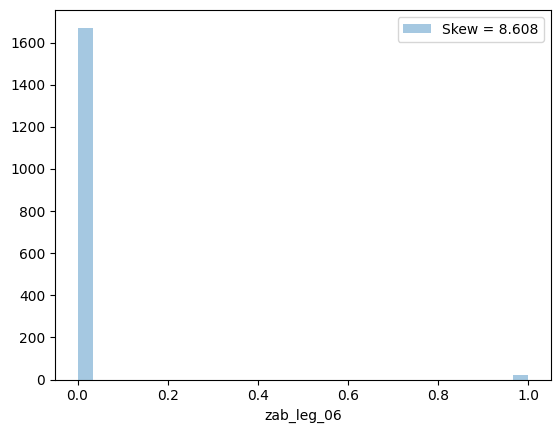

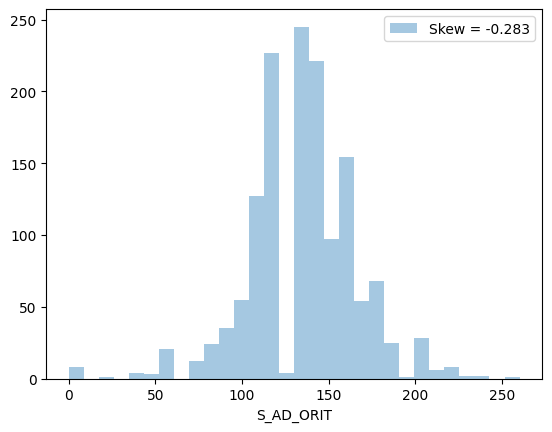

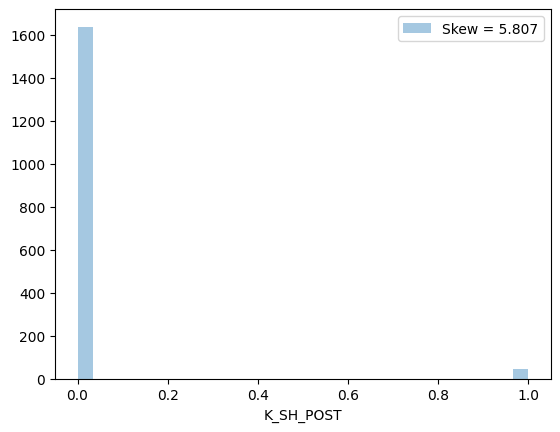

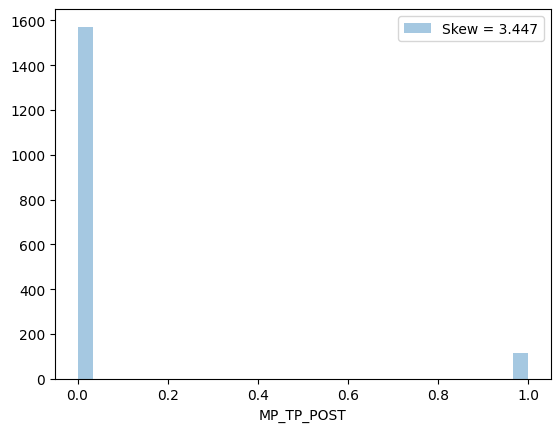

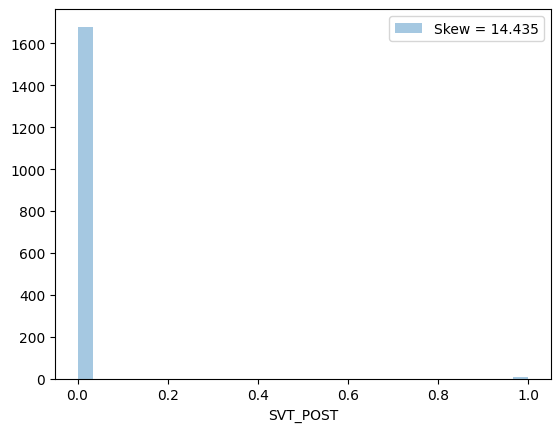

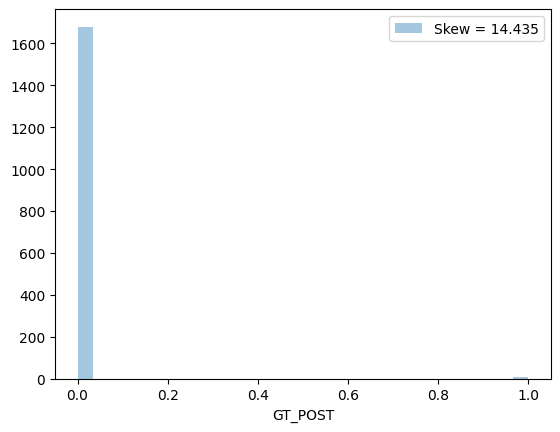

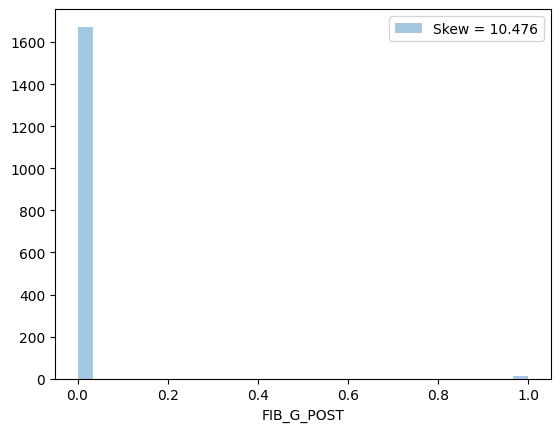

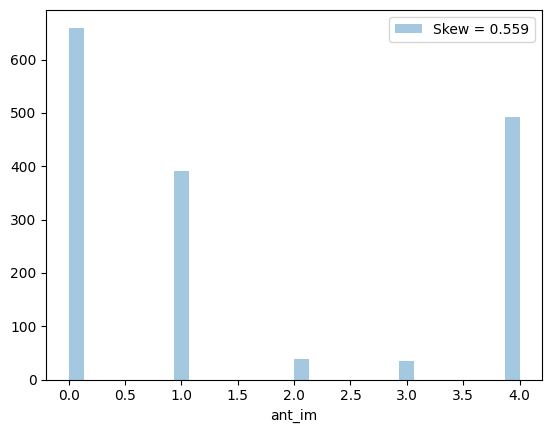

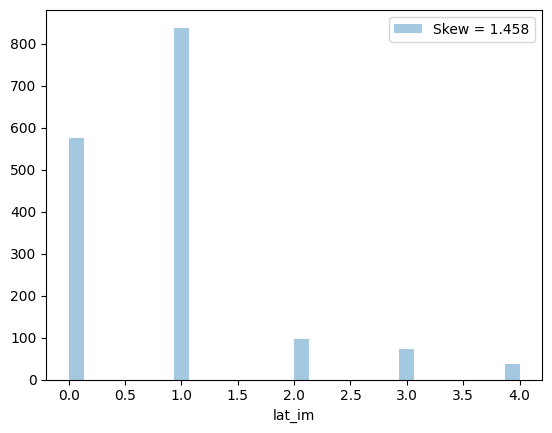

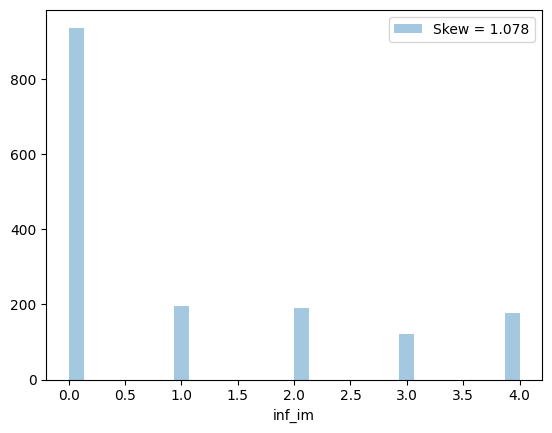

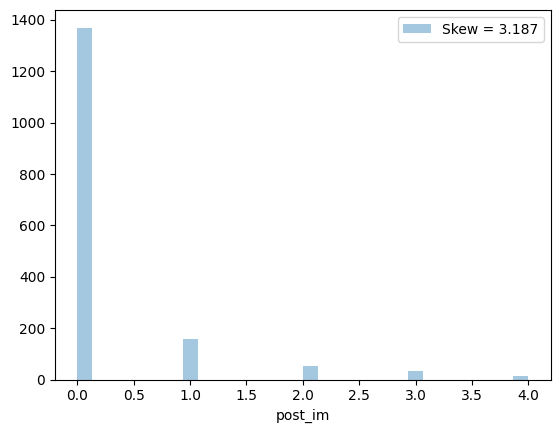

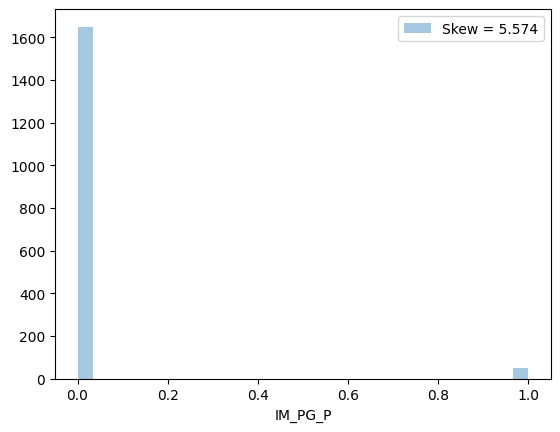

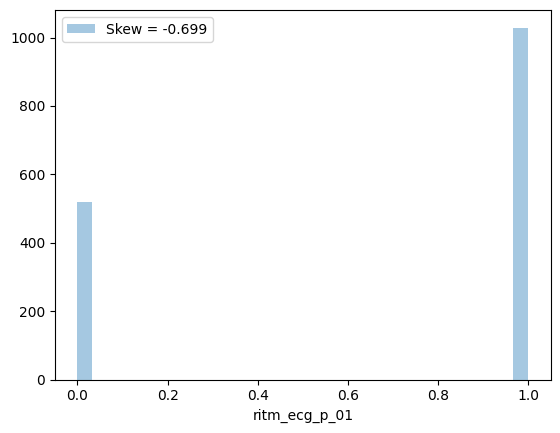

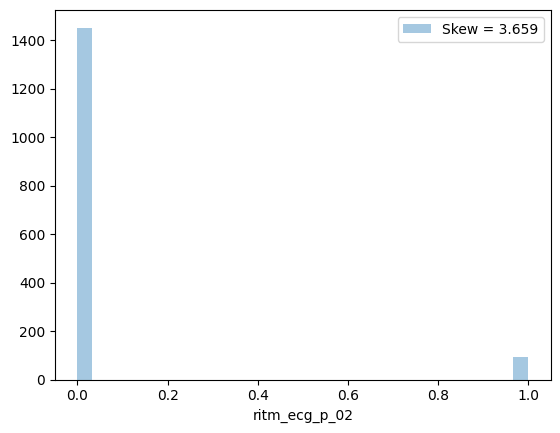

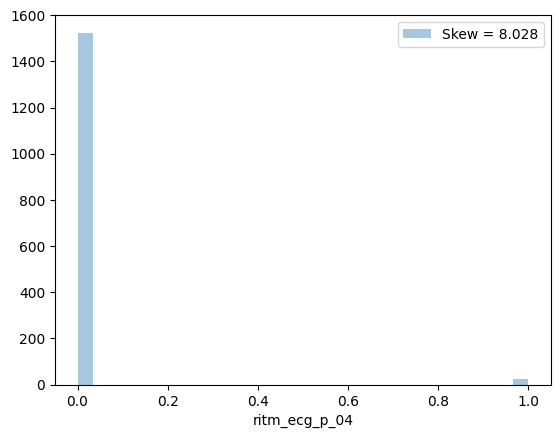

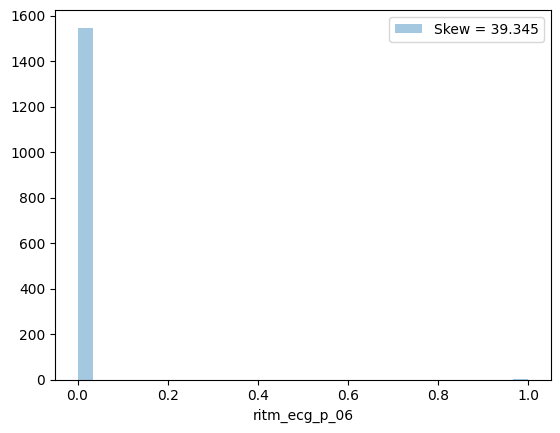

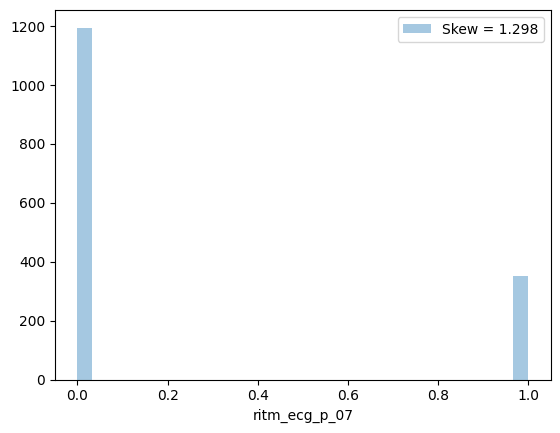

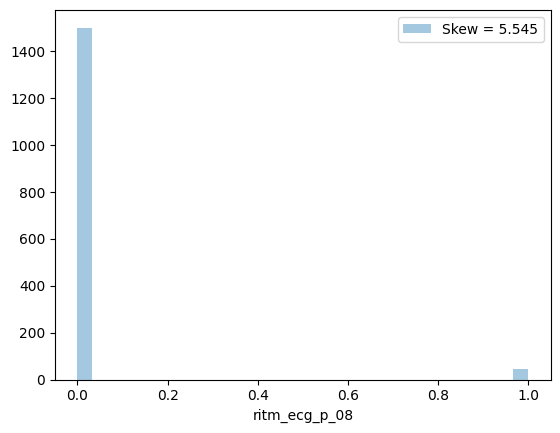

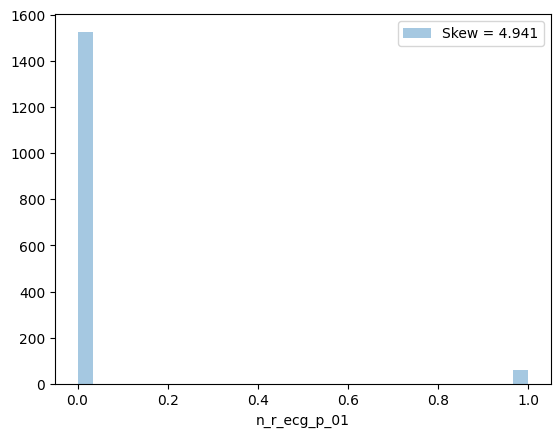

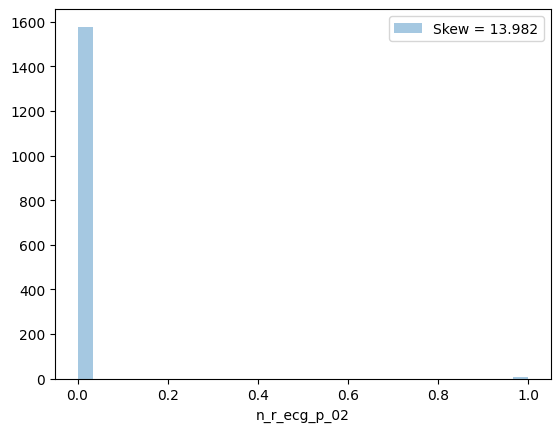

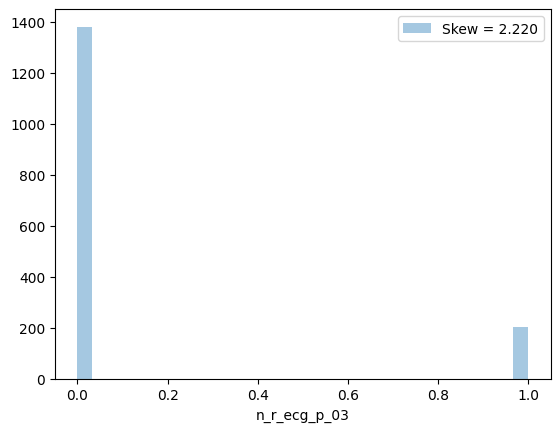

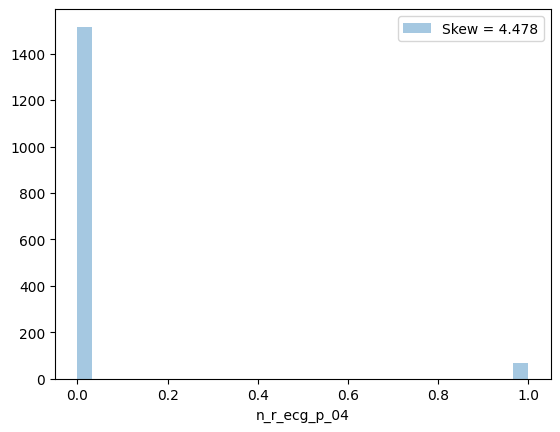

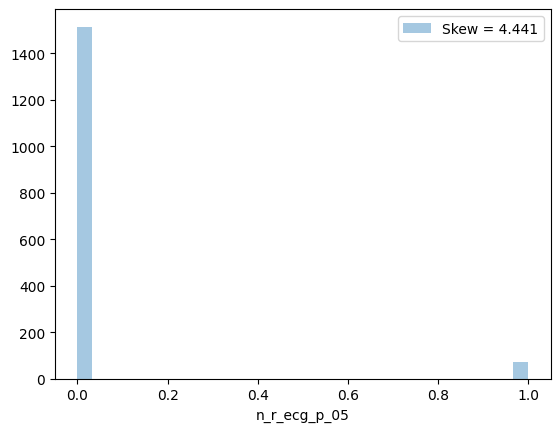

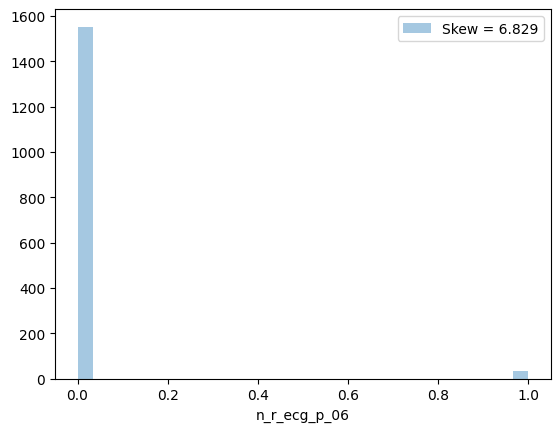

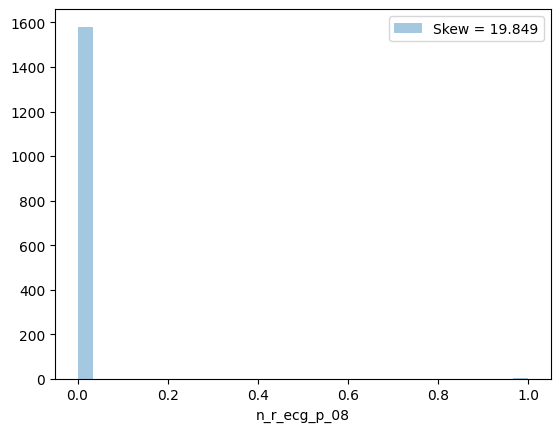

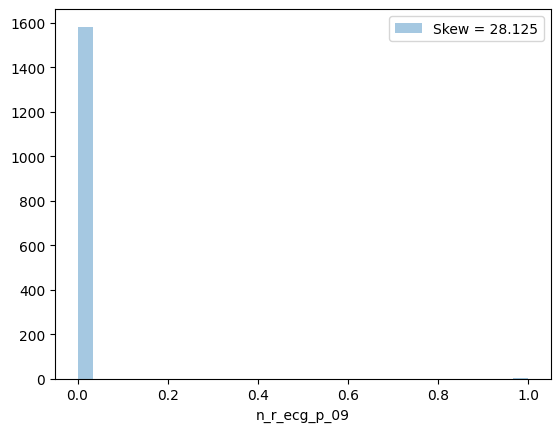

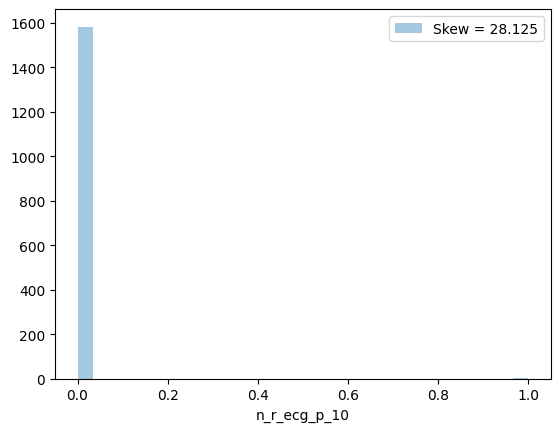

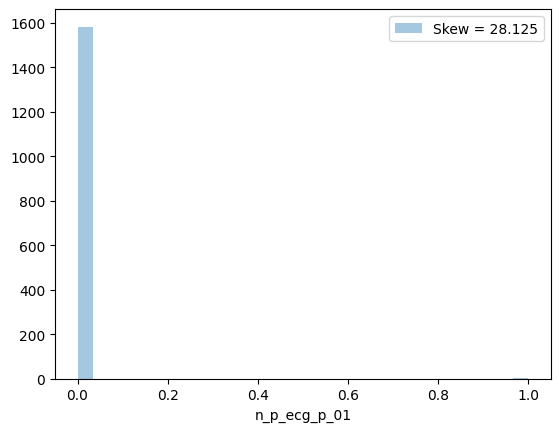

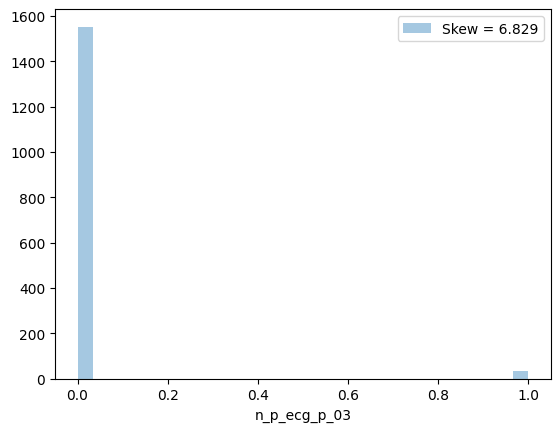

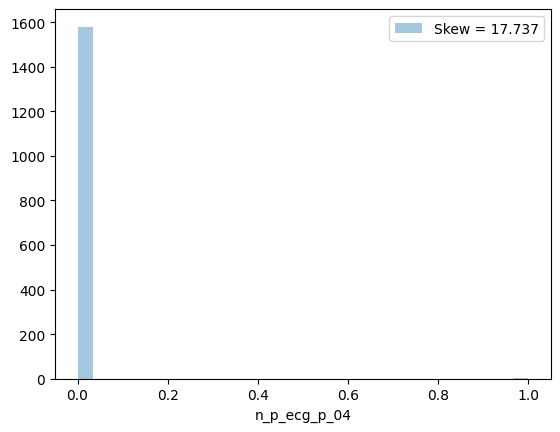

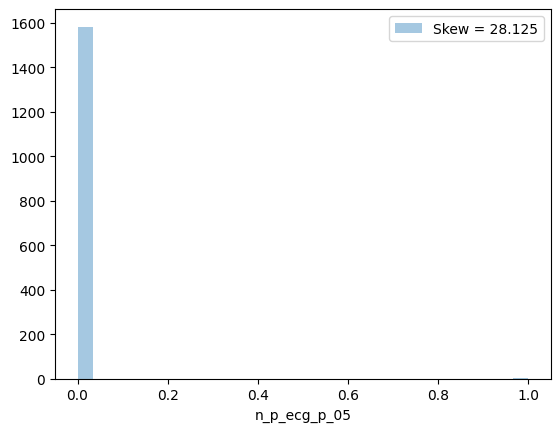

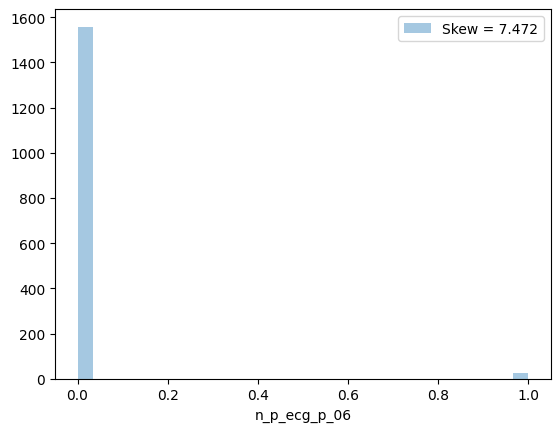

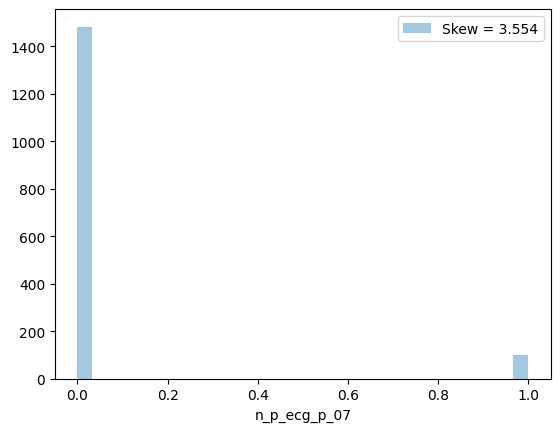

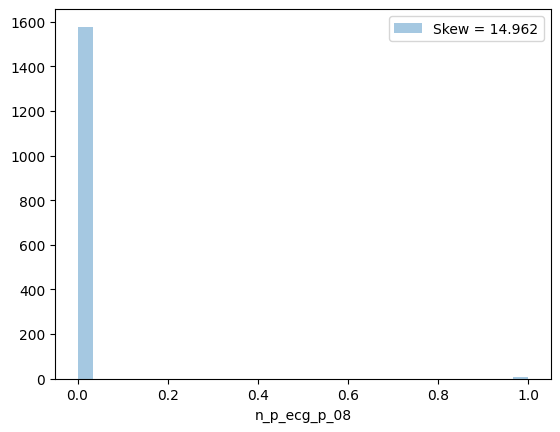

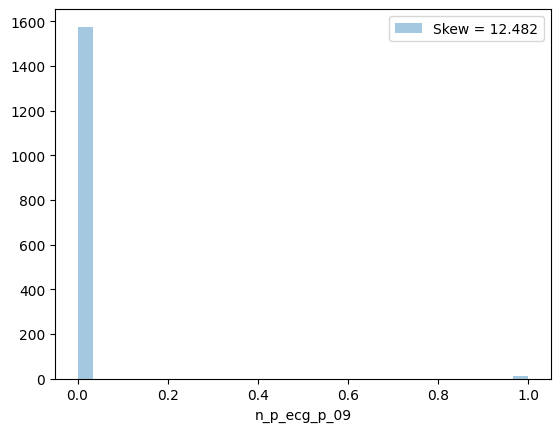

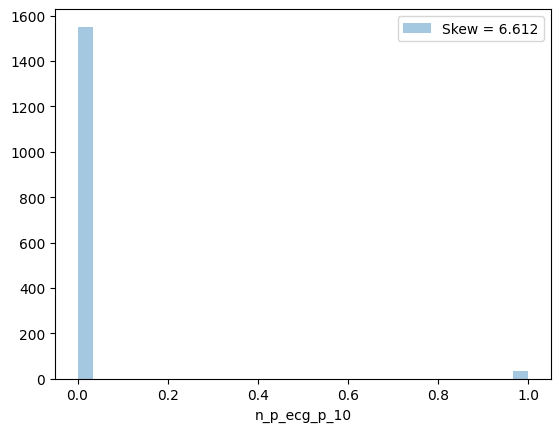

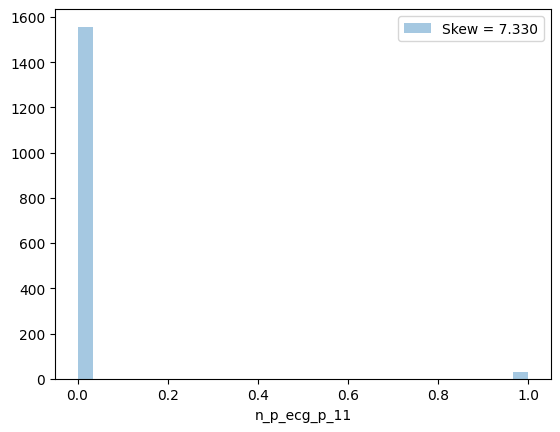

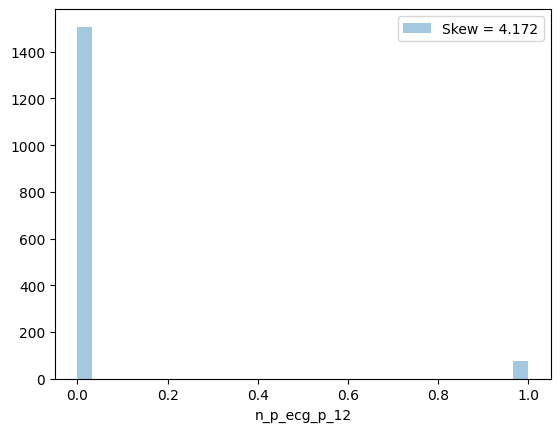

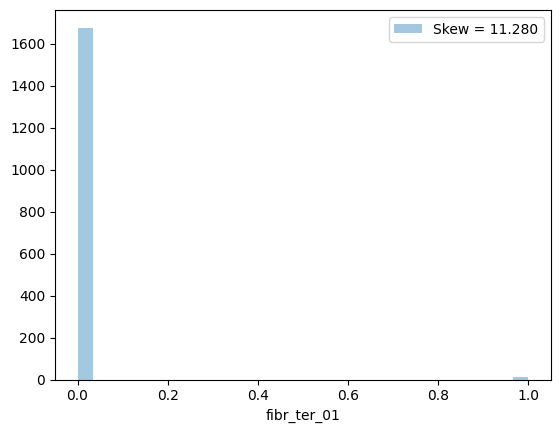

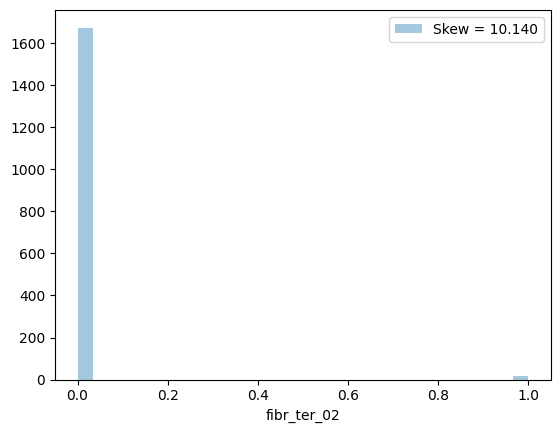

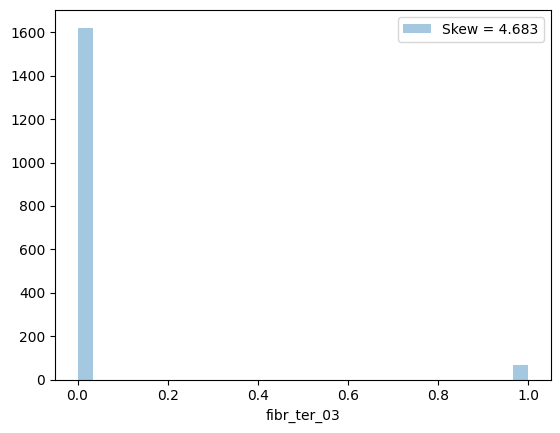

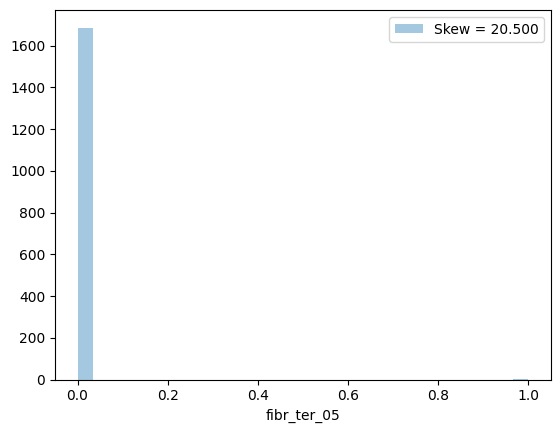

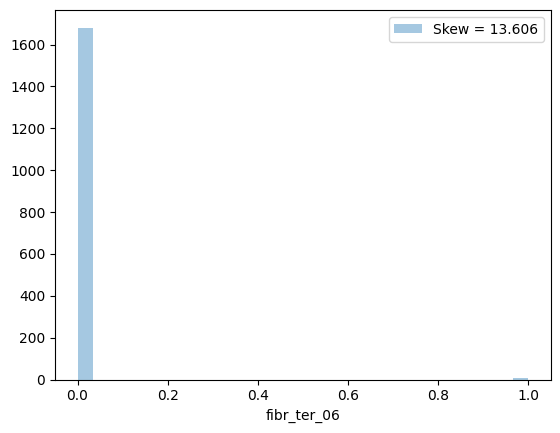

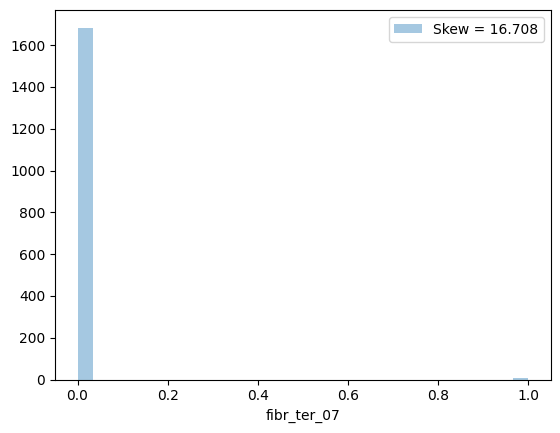

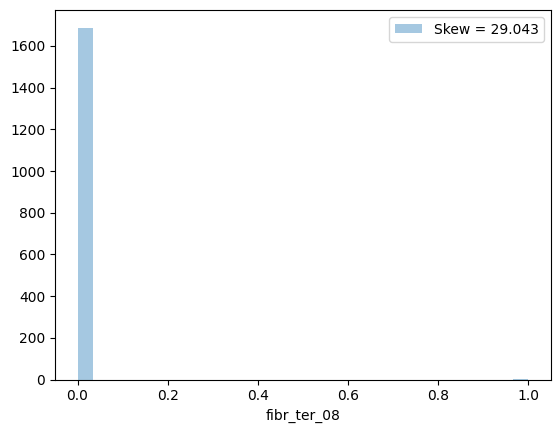

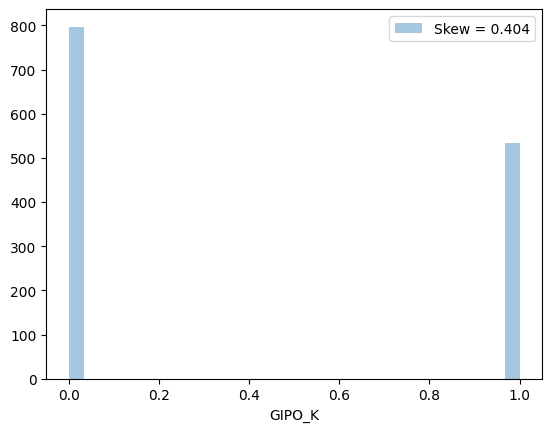

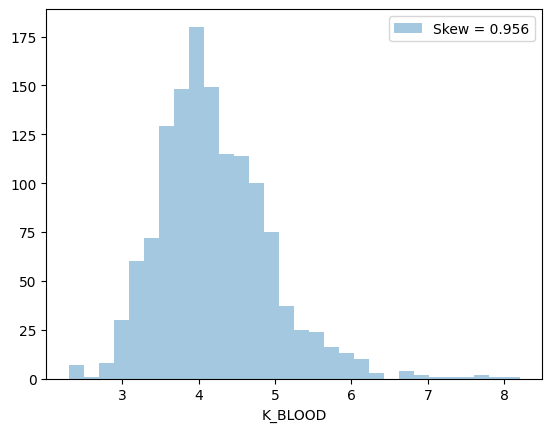

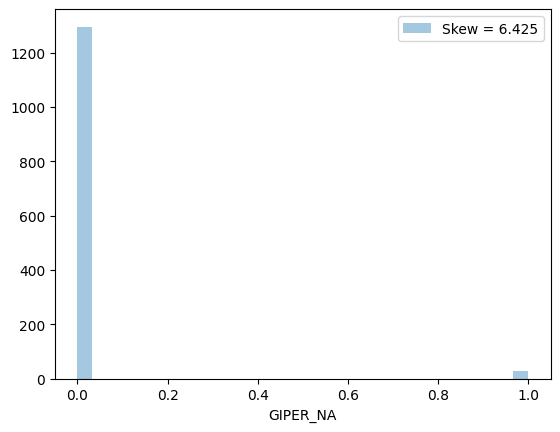

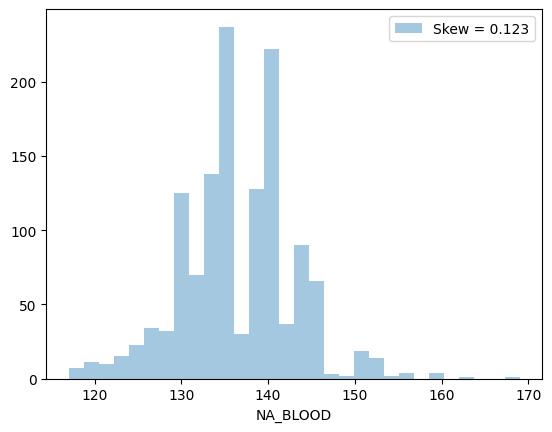

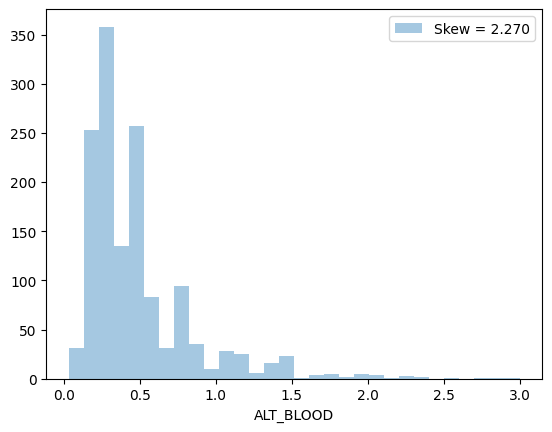

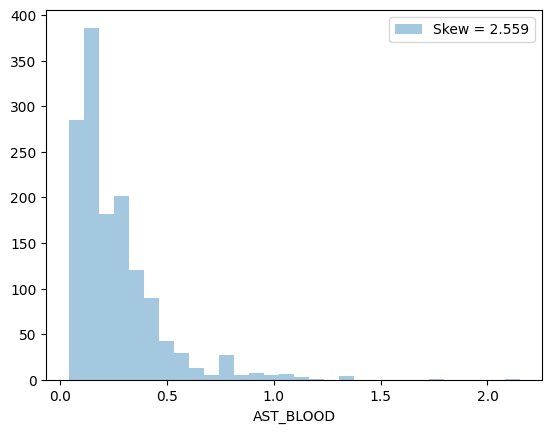

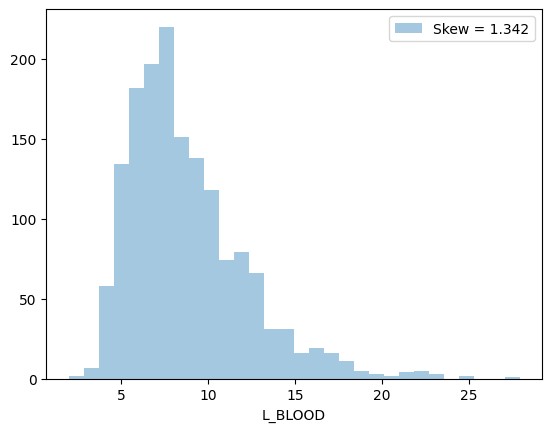

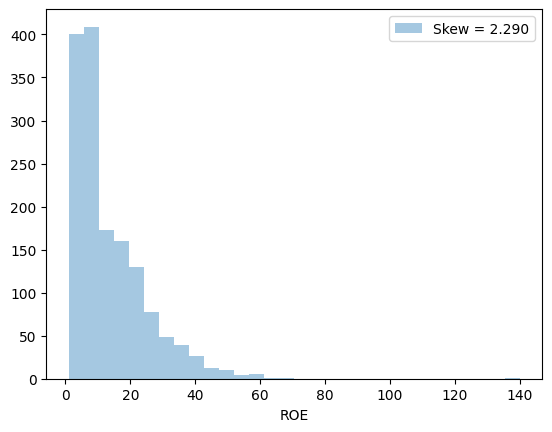

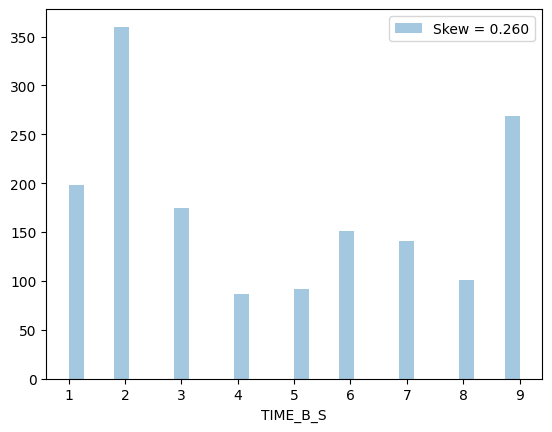

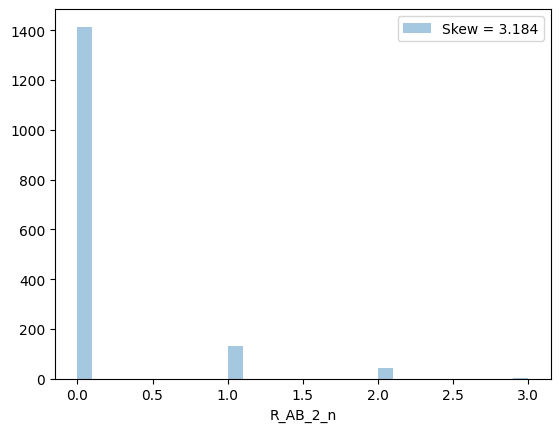

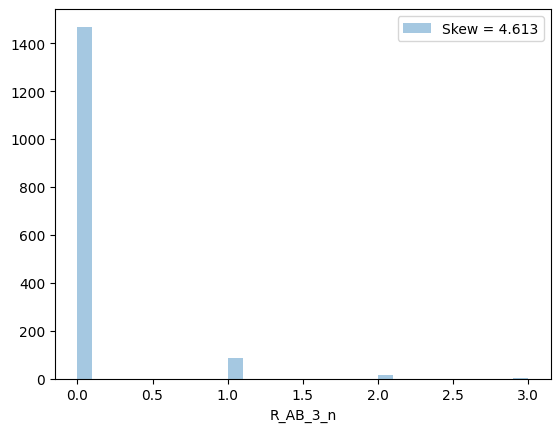

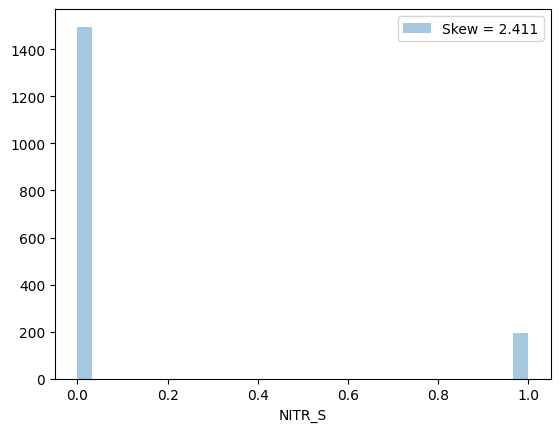

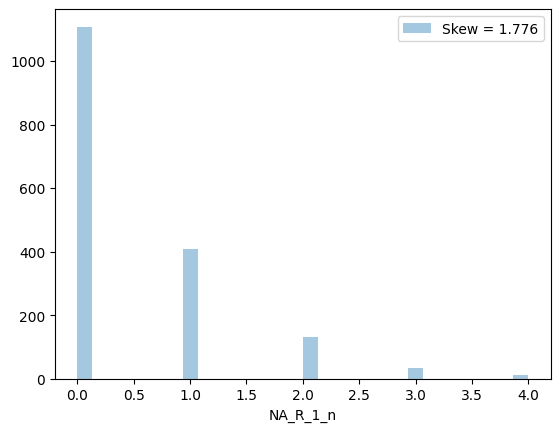

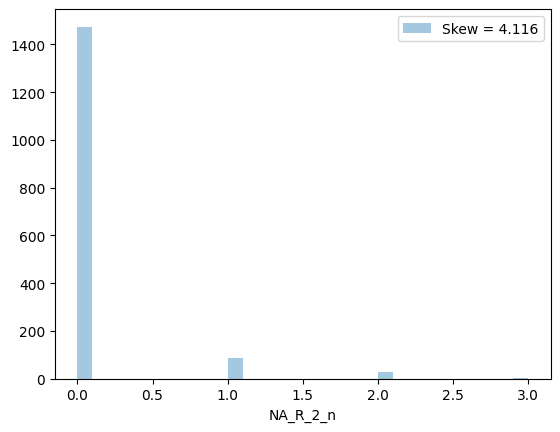

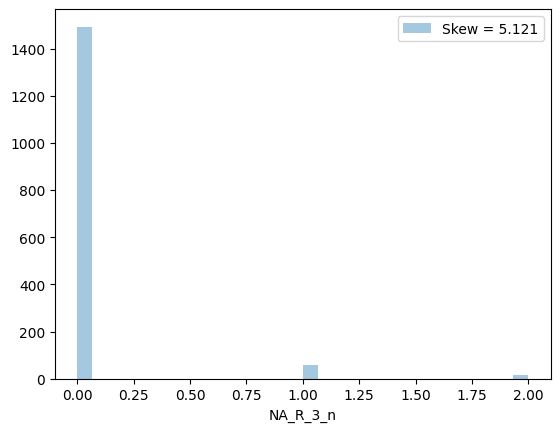

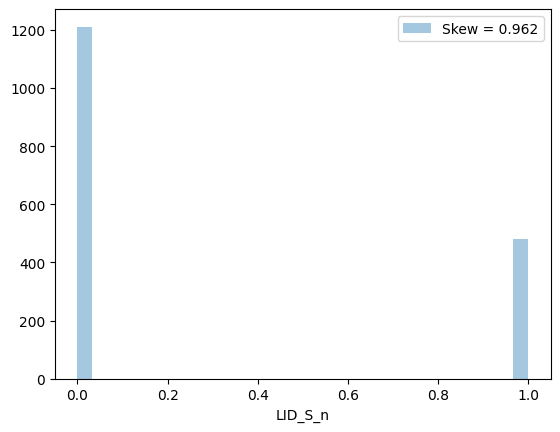

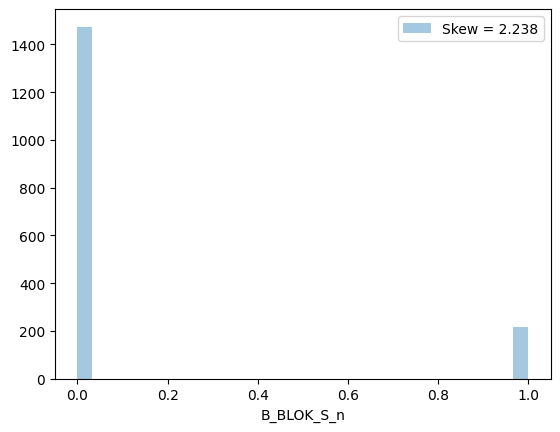

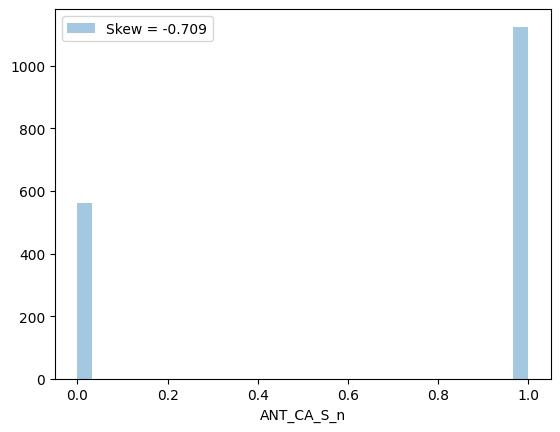

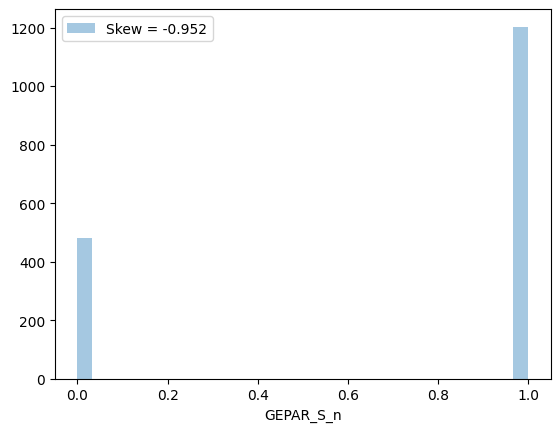

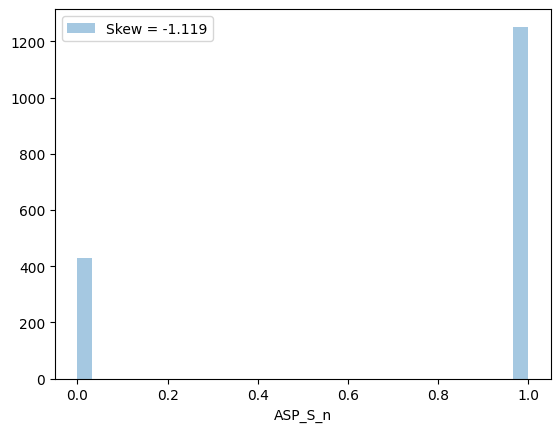

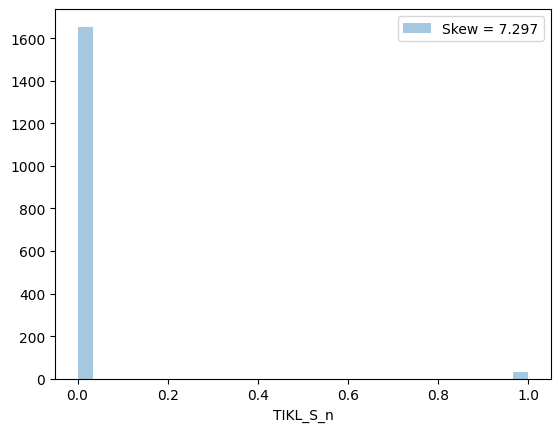

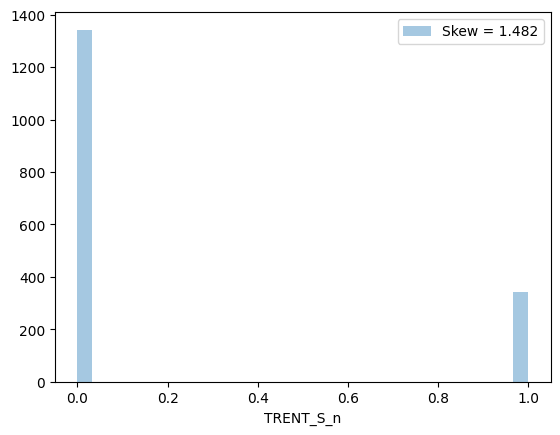

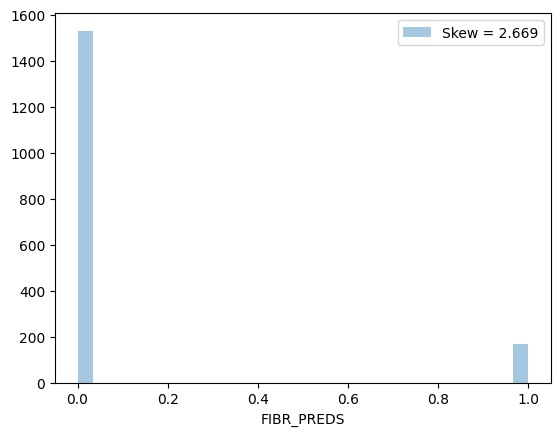

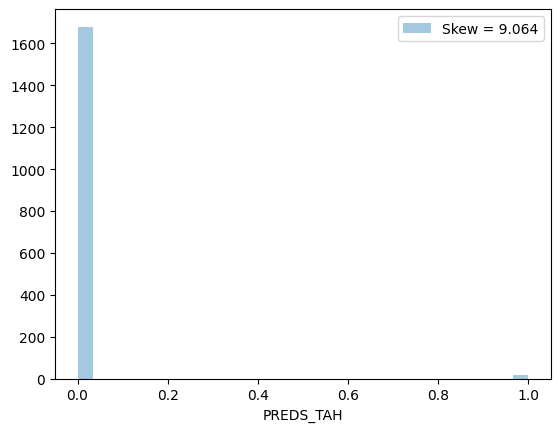

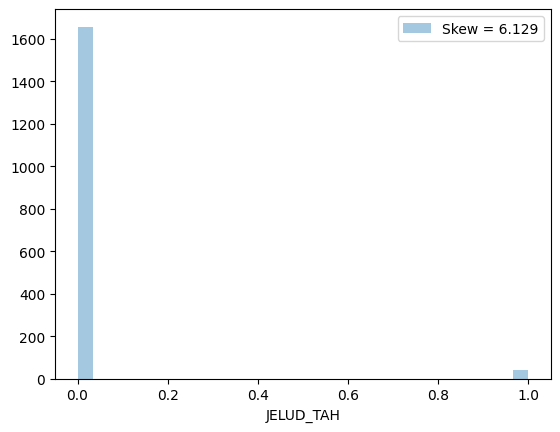

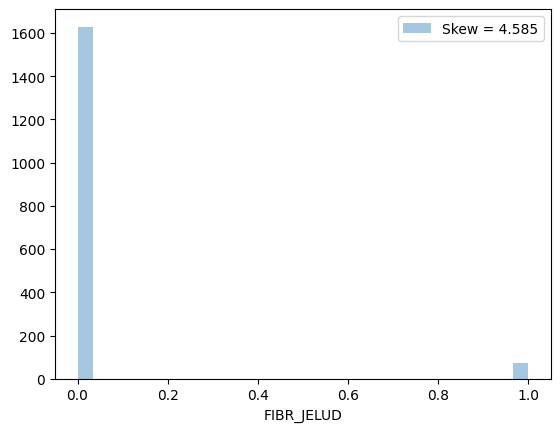

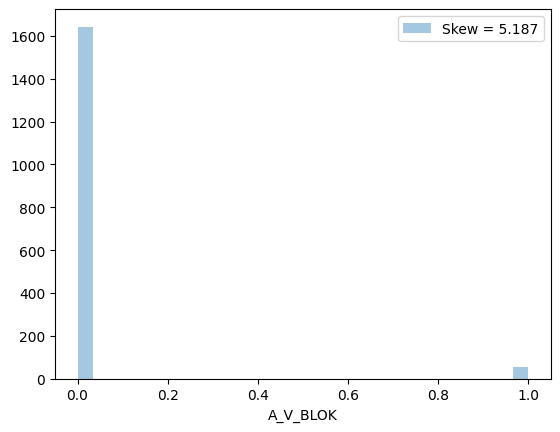

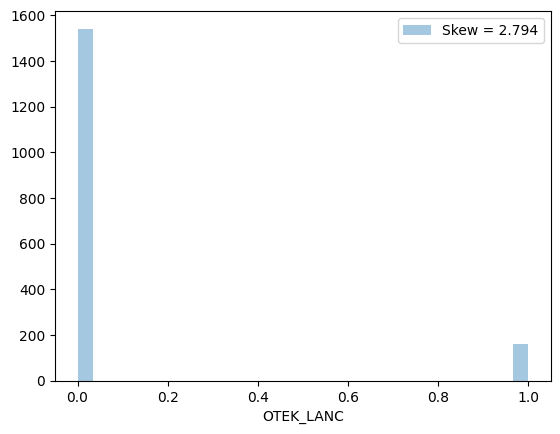

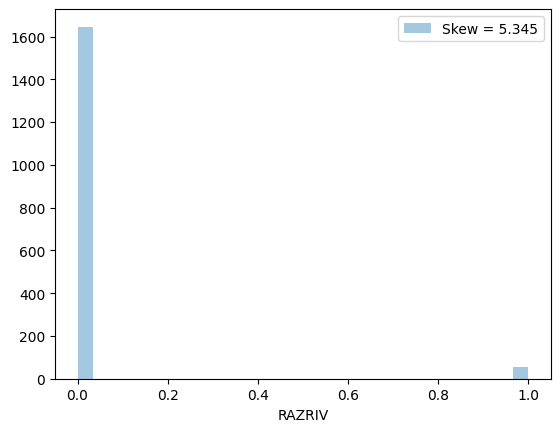

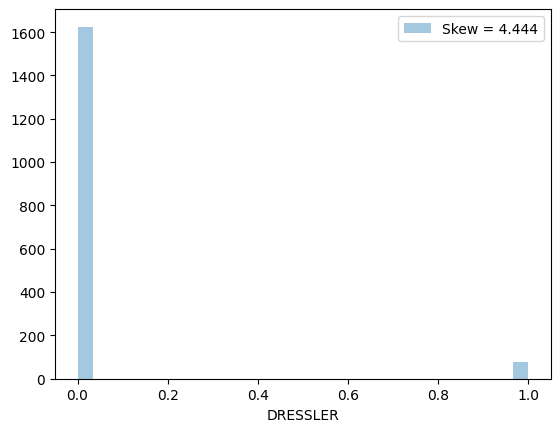

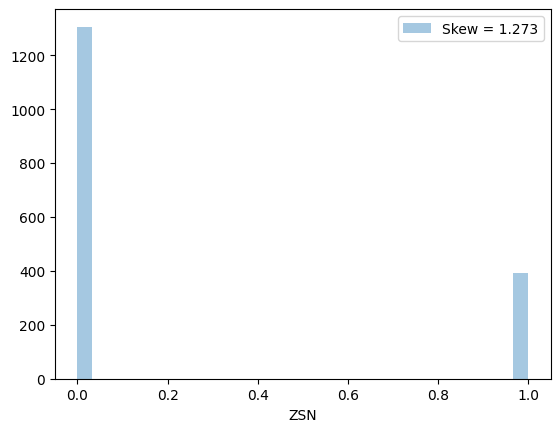

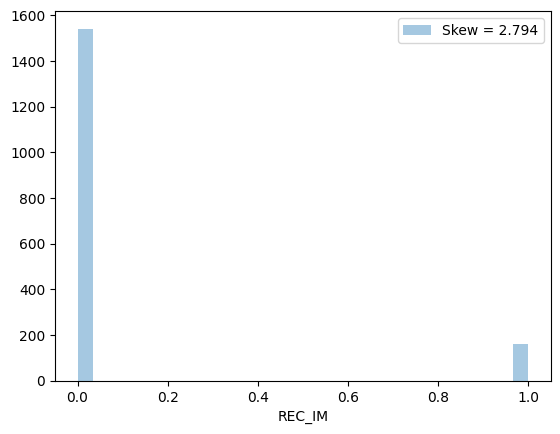

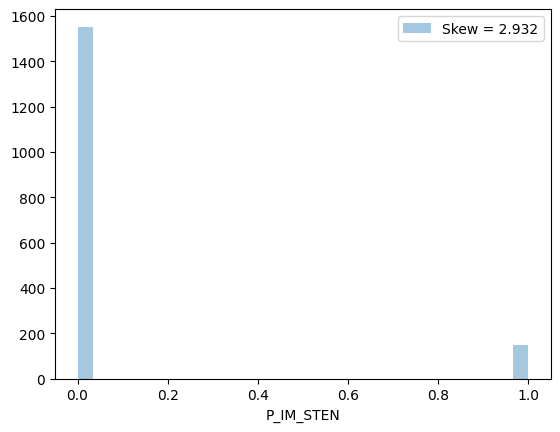

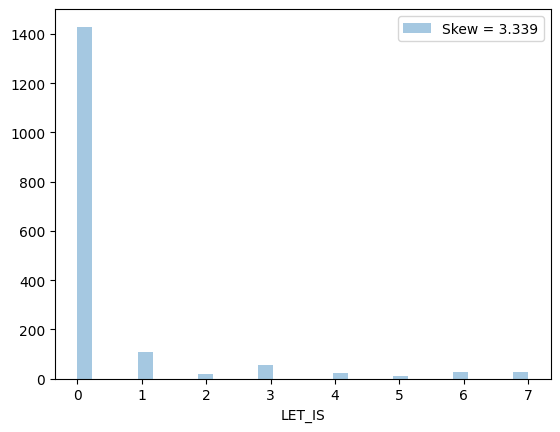

In [ ]:
import seaborn as sns
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Axes: >

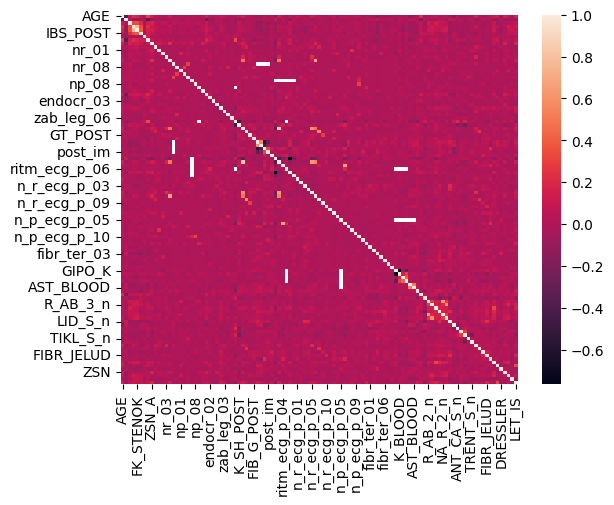

In [ ]:
sns.heatmap(df.corr())

<Axes: >

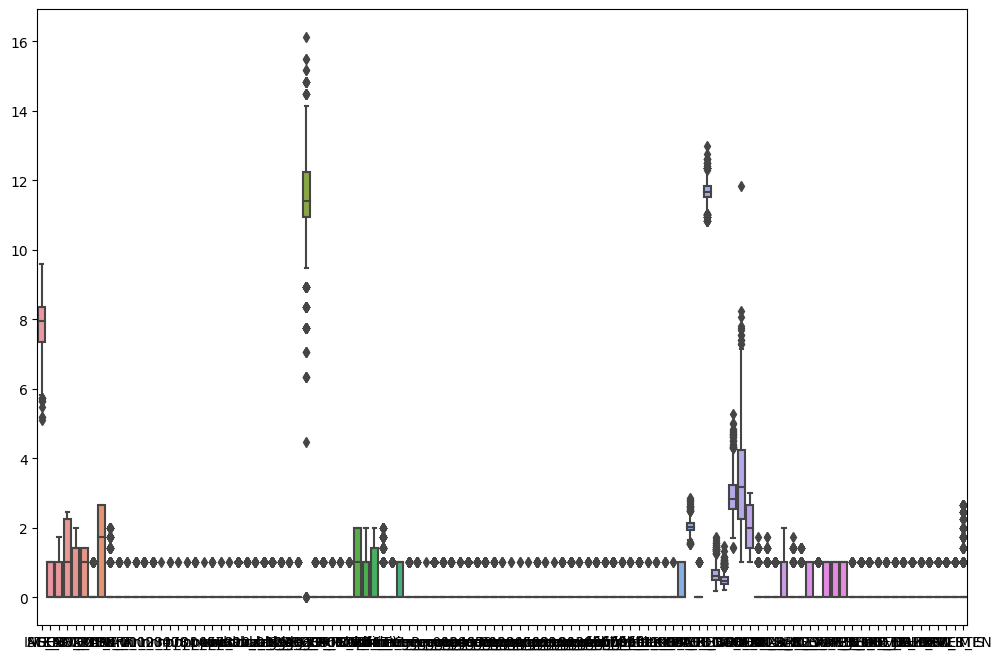

In [ ]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

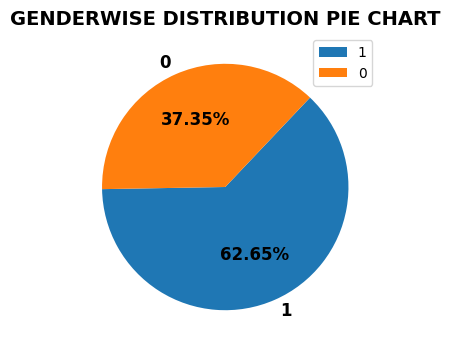

In [ ]:
plt.figure(figsize = (8,4))
plt.pie(pd.value_counts(df.SEX),labels=[1,0], autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':0,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("GENDERWISE DISTRIBUTION PIE CHART", fontsize = 14, fontweight = 'bold')
plt.show()

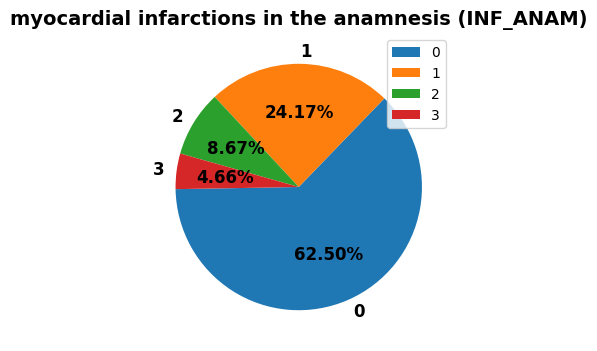

In [ ]:
plt.figure(figsize = (8,4))
plt.pie(pd.value_counts(df.INF_ANAM),labels=[0,1,2,3], autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':0,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("myocardial infarctions in the anamnesis (INF_ANAM)", fontsize = 14, fontweight = 'bold')
plt.show()

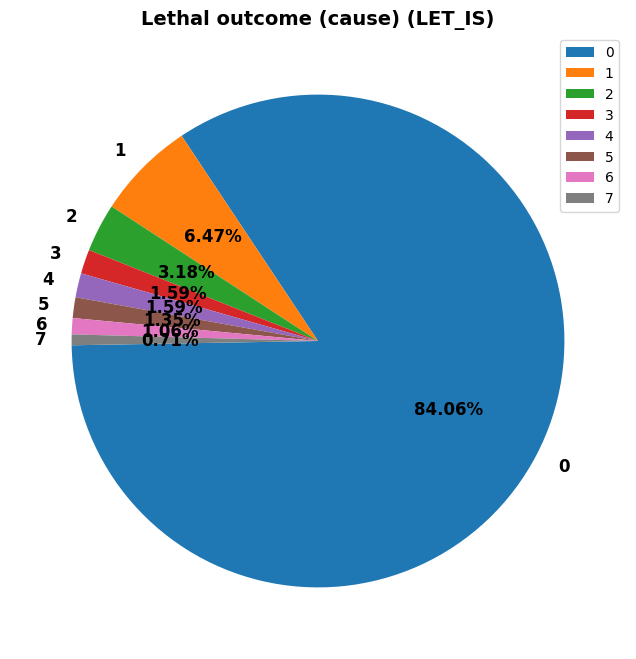

In [ ]:
plt.figure(figsize = (9,8))
plt.pie(pd.value_counts(df.LET_IS),labels=[0,1,2,3,4,5,6,7], autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':0,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Lethal outcome (cause) (LET_IS)", fontsize = 14, fontweight = 'bold')
plt.show()

0: unknown (alive) 1429 84.06%
1: cardiogenic shock 110 6.47%
2:myocardial rupture 54 3.18%
3: asystole 27 1.59%
4: ventricular fibrillation 27 1.59%
5: progress of congestive heart failure 23 1.35%
6:  pulmonary edema 18 1.06%
7: thromboembolism 12 0.71%

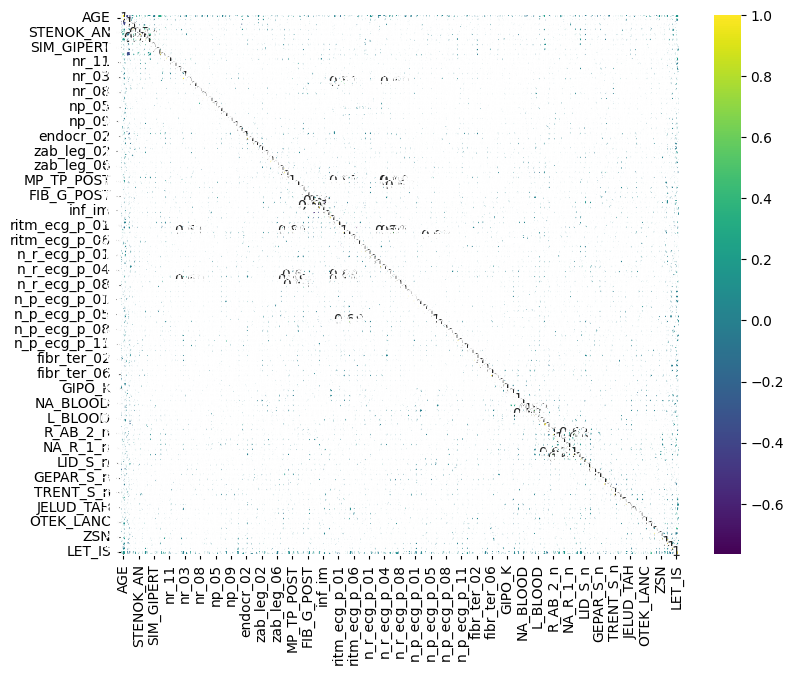

In [ ]:
#correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

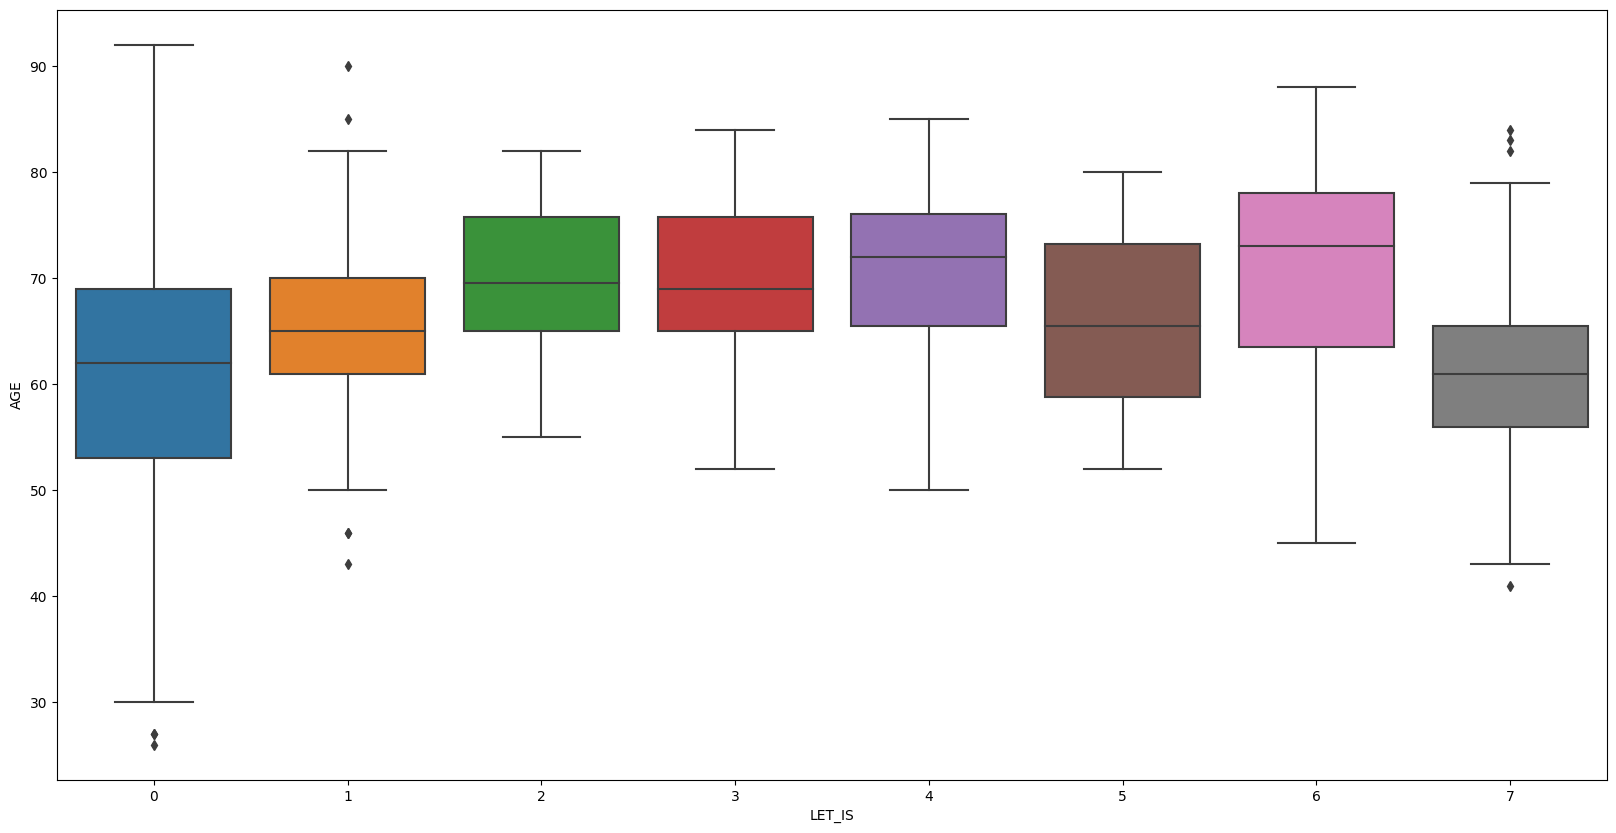

In [ ]:
# AgeWise Lethal Outcome
plt.figure(figsize=(20,10))
sns.boxplot(x='LET_IS',y='AGE',data=df)
plt.show()

Observation:
As we can observe maximum Lethal Outcome cause is ranging between 50 to 80 age

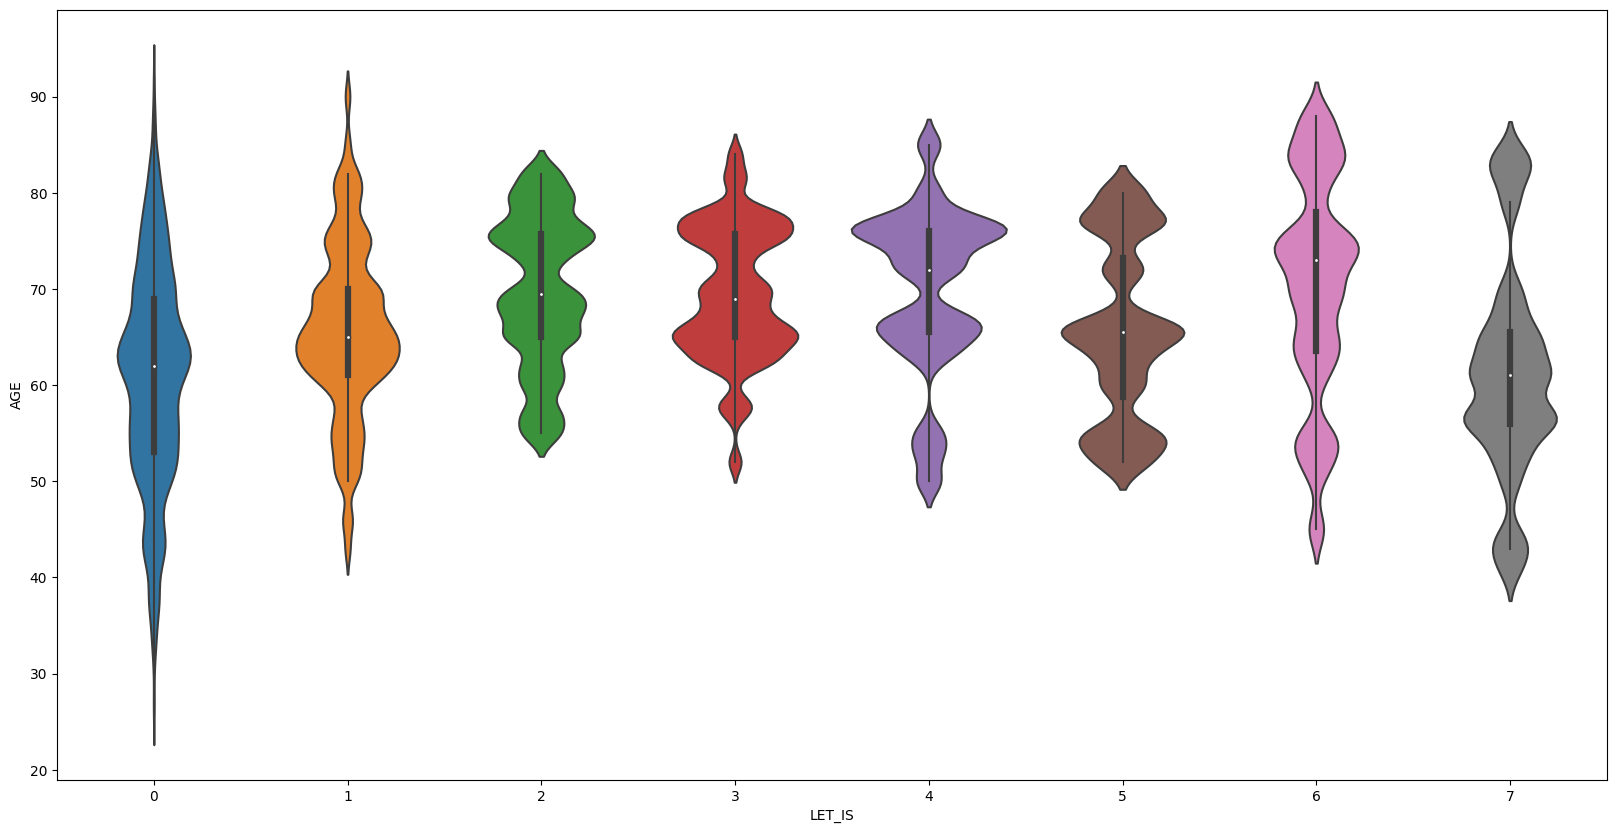

In [ ]:
#violine plot
plt.figure(figsize=(20,10))
sns.violinplot(data= df

               , x='LET_IS',y='AGE',bw=.15)
plt.show()

<Figure size 2000x1000 with 0 Axes>

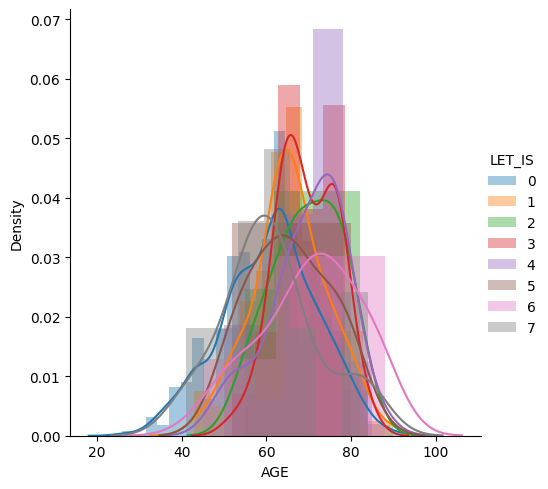

In [ ]:
plt.figure(figsize=(20,10))
sns.FacetGrid(df,hue='LET_IS',height=5).map(sns.distplot,'AGE').add_legend()
plt.show()

Observation:
We can see that myocardial rupture has high peak and the age range is between 50 to 90

Observations:

After applying Winsorization method on the features we can see that the outliers in the Age,S_AD_ORIT and NA_BLOOD has been replace the smallest and largest values with the observations closest to them

Handling Missing Data

Data imputation

Columns with too many missing values

In [ ]:
dataframe = pd.read_csv("/content/Myocardial.csv", header=0, na_values='?')

In [ ]:
# missing values per column (# selected column threshold: 30%)
column_list = []
for i in range(dataframe.shape[1]):
    n_miss = dataframe.iloc[:,i].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    # print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    if perc >= 30:
        column_list.append(i)

In [ ]:
# drop rows with missing values
dataframe_col_name = dataframe.columns
dataframe_col_name_delete= dataframe_col_name[column_list]
dataframe.drop(dataframe_col_name_delete, axis=1, inplace=True)

In [ ]:
dataframe.to_csv('Myocardial_2.csv')
dataframe_2 = pd.read_csv("Myocardial_2.csv", index_col = 0, na_values='?')

In [ ]:
# missing values per row (selected column threshold: 30%)
row_list = []
for i in range(dataframe_2.shape[0]):
    n_miss = dataframe_2.iloc[i].isnull().sum()
    perc = n_miss / dataframe_2.shape[1] * 100
    # print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    if perc >= 30:
        row_list.append(i)

In [ ]:
dataframe_2.drop(row_list,axis=0,inplace=True)
dataframe_2.to_csv('Myocardial_3.csv')
X = dataframe_2.iloc[:, 0:104]

In [ ]:
X = dataframe_2.iloc[:, 0:104]
y = dataframe_2.iloc[:, 104]

In [ ]:
# create list of binary variables
binary_list = []
for i in range(len(X.iloc[0])):
    if X.iloc[:,i].max() == 1:
        binary_list.append(i)

In [ ]:
# create list of continuous variables
continuous_list = [0,32,33,79,81,82,83,84,85]

# create list of all variables
listt = [*range(104)]

In [ ]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

In [ ]:
# create list of categorical variables
binary_categorical = Diff(listt, continuous_list)
categorical_list = Diff(binary_categorical,binary_list)

In [ ]:
# convert binary to boolean
for i in range(len(X.columns[binary_list])):
    X[X.columns[binary_list][i]] = X[X.columns[binary_list][i]].astype('bool')
X[X.columns[binary_list]]
X_binary = X[X.columns[binary_list]]
binary_name = X_binary.columns

In [ ]:
# convert continuous to float
for i in range(len(X.columns[continuous_list])):
    X[X.columns[continuous_list][i]] = X[X.columns[continuous_list][i]].astype('float')
X[X.columns[continuous_list]]
X_continuous = X[X.columns[continuous_list]]
cont_name = X_continuous.columns

In [ ]:
# convert categorical to integer
for i in range(len(X.columns[categorical_list])):
    X[X.columns[categorical_list][i]] = X[X.columns[categorical_list][i]].astype('float')
X[X.columns[categorical_list]]
X_categorical = X[X.columns[categorical_list]]
catg_name = X_categorical.columns

Data imputation

---



---



For the remaining rows and columns with missing value ratio of less than 30%, I apply basic data imputation.

For binary and continuous variables,  apply k-nearest neighbor imputation. As the name suggests, the ‘k-nearest neighbor’ imputation strategy looks at nearest neighbors to determine the imputed value.

In [ ]:
# impute binary variables
imputer = KNNImputer(n_neighbors=5)
imputer=imputer.fit(X_binary)

# convert to array
X_binary = imputer.transform(X_binary)
X_binary = pd.DataFrame(X_binary)
X_binary.columns = binary_name
X_binary.to_csv('Myocardial_binary.csv',sep=",")
# check null values
print("Total sum of all missing values in X_binary:", X_binary.isnull().sum(axis = 0).sum())

Total sum of all missing values in X_binary: 0


In [ ]:
# impute continuous variables
imputer = KNNImputer(n_neighbors=5)
imputer=imputer.fit(X_continuous)

X_continuous = imputer.transform(X_continuous)
X_continuous = pd.DataFrame(X_continuous)
X_continuous.to_csv('Myocardial_cont.csv',sep=",")
X_continuous.columns = cont_name
print("Total sum of all missing values in X_continuous:", X_continuous.isnull().sum(axis = 0).sum())

Total sum of all missing values in X_continuous: 0


For categorical variables, I apply the most frequent imputation strategy. This prevents categorical values from having fractional values and the missing values will be replaced by the mode.

In [ ]:
# impute categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer=imputer.fit(X_categorical)

X_categorical = imputer.transform(X_categorical)
X_categorical = pd.DataFrame(X_categorical)
X_categorical.columns = catg_name
X_categorical.to_csv('Myocardial_catg.csv',sep=",")
print("Total sum of all missing values in X_categorical:",X_categorical.isnull().sum(axis = 0).sum())

Total sum of all missing values in X_categorical: 0


In [ ]:
# return columns of an array
def column(matrix, i):
    return [row[i] for row in matrix]

One-hot Encoding

After imputing missing values, our categorical variables still had the problem of being ordered.  convert these features into numbers using one-hot-encoding. With one-hot-encoding, each categorical level becomes a separate feature in the dataset with binary values (1 or 0). This allows machine learning algorithms to read categorical data in a better way.

In [ ]:
# encode categorical variables
X_cat = X_categorical.to_numpy()
encoded_dataframe = pd.get_dummies(column(X_cat,0))

for i in range(1,len(X_categorical.iloc[0])):
    encoded = pd.get_dummies(column(X_cat,i))
    encoded_dataframe = pd.concat([encoded_dataframe, encoded], axis=1)

categorical_names = [*np.arange(101)]
encoded_dataframe.columns = categorical_names
encoded_dataframe.to_csv('Myocardial_encoding.csv',sep=",")

Normalization

The continuous variables has different scales, which is a problem. This would cause continuous variables with large absolute values to affect the algorithm more.

To avoid this problem,  apply centering. I subtract the mean and divide by the standard deviation of each variable. This way, each continuous variable has zero mean and one unit of standard deviation.

In [ ]:
# standardize continuous variables
for i in range(len(X_continuous.iloc[0])):
    X_continuous.iloc[:, i] = (X_continuous.iloc[:, i] - X_continuous.iloc[:, i].mean())/X_continuous.iloc[:, i].std()

# combine datasets
X_all_combined = pd.concat([X_continuous, encoded_dataframe, X_binary], axis=1)
X_all_combined.to_csv('Myocardial_2_v2.csv')
X_df = X_all_combined

Train-test Split

 partition the data into training, cross-validation and test sets. To ensure equally balanced classes that best represent the population, apply stratified sampling during the train-valid-test split.

In [ ]:
counter = Counter(y)
print(counter)

Counter({1: 923, 0: 753})


In [ ]:
random.seed(240)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
counter = Counter(y_train)
print(counter)


Counter({1: 738, 0: 602})


Decision Tree

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 21):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>2 0.508 (0.052)
>3 0.522 (0.050)
>4 0.532 (0.037)
>5 0.531 (0.036)
>6 0.549 (0.042)
>7 0.547 (0.031)
>8 0.546 (0.030)
>9 0.536 (0.050)
>10 0.566 (0.040)
>11 0.557 (0.042)
>12 0.550 (0.051)
>13 0.564 (0.035)
>14 0.570 (0.041)
>15 0.571 (0.046)
>16 0.576 (0.044)
>17 0.564 (0.046)
>18 0.569 (0.044)
>19 0.567 (0.048)
>20 0.575 (0.041)


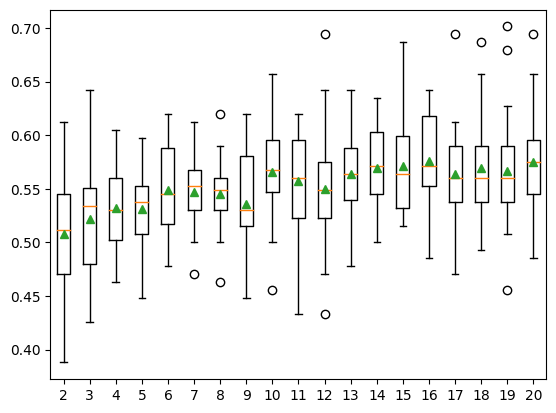

In [ ]:
# get the models to evaluate
models = get_models()
X_train.columns = X_train.columns.map(str)

# evaluate models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# RFE
# 10 features
rfe_10 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe_10.fit(X_train, y_train)

# report selected features
for i in range(X_train.shape[1]):
    if(rfe_10.support_[i] == True):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_10.support_[i], rfe_10.ranking_[i]))

# store selected features
DT_selected_list_10 = []
for i in range(X_train.shape[1]):
    if rfe_10.support_[i] == True:
        DT_selected_list_10.append(i)
X_train.columns[DT_selected_list_10]
X_train_10 = X_train[X_train.columns[DT_selected_list_10]]

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 26, Selected True, Rank: 1.000


In [ ]:
# 15 features
rfe_15 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
rfe_15.fit(X_train, y_train)

# report selected features
for i in range(X_train.shape[1]):
    if(rfe_15.support_[i] == True):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_15.support_[i], rfe_15.ranking_[i]))

# store selected features
DT_selected_list_15 = []
for i in range(X_train.shape[1]):
    if rfe_15.support_[i] == True:
        DT_selected_list_15.append(i)
DT_selected_list_15
X_train.columns[DT_selected_list_15]
X_train_15 = X_train[X_train.columns[DT_selected_list_15]]

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 41, Selected True, Rank: 1.000
Column: 95, Selected True, Rank: 1.000
Column: 126, Selected True, Rank: 1.000
Column: 176, Selected True, Rank: 1.000
Column: 177, Selected True, Rank: 1.000


Hyperparameter tuning

In [ ]:
# 10 features
param_test1 = {
 'max_depth':range(2,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(DecisionTreeClassifier(),param_test1)

grid.fit(X_train_10,y_train)
grid.best_params_, grid.best_score_

({'max_depth': 4, 'min_samples_leaf': 10}, 0.5955223880597014)

In [ ]:
# 15 features
param_test1 = {
 'max_depth':range(3,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(DecisionTreeClassifier(),param_test1)
grid.fit(X_train_15,y_train)
grid.best_params_, grid.best_score_

({'max_depth': 12, 'min_samples_leaf': 35}, 0.6111940298507463)

In [ ]:
# all features
param_test1 = {
 'max_depth':range(2,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(DecisionTreeClassifier(),param_test1)
grid.fit(X_train,y_train)
grid.best_params_, grid.best_score_

({'max_depth': 9, 'min_samples_leaf': 25}, 0.612686567164179)

Predict

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
clf_dt = clf_dt.fit(X_train,y_train)

X_test.columns = X_test.columns.map(str)
y_pred = clf_dt.predict(X_test)

# report metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-measure:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6101190476190477
Precision: 0.6015037593984962
Recall: 0.8648648648648649
F-measure: 0.7095343680709534


Decision tree diagram

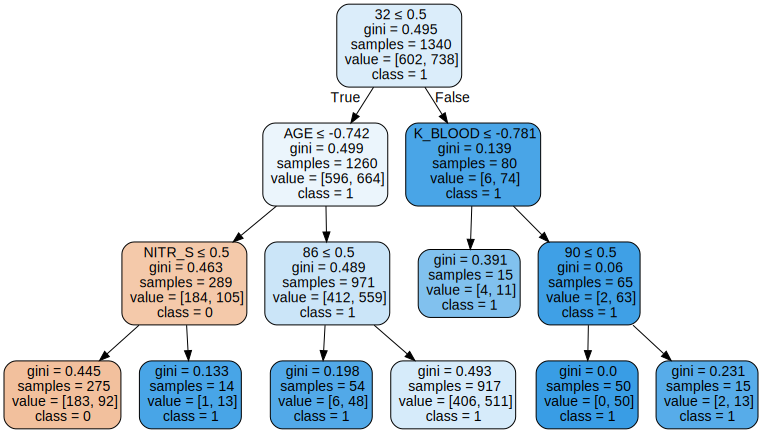

In [ ]:
clf = clf_dt.fit(X_train,y_train)

column_names_full = X_train.columns

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=column_names_full,
                                class_names=["0","1"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("MI_full")
graph

Random Forest

In [ ]:
def get_models():
    models = dict()
    for i in range(2, 21):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# RFE
# 10 features
rfe_10 = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe_10.fit(X_train, y_train)

# report selected features
for i in range(X_train.shape[1]):
    if(rfe_10.support_[i] == True):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_10.support_[i], rfe_10.ranking_[i]))

# store selected features
DT_selected_list_10 = []
for i in range(X_train.shape[1]):
    if rfe_10.support_[i] == True:
        DT_selected_list_10.append(i)
X_train.columns[DT_selected_list_10]
X_train_10 = X_train[X_train.columns[DT_selected_list_10]]

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 41, Selected True, Rank: 1.000


In [ ]:
# 15 features
rfe_15 = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
rfe_15.fit(X_train, y_train)

# report selected features
for i in range(X_train.shape[1]):
    if(rfe_15.support_[i] == True):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_15.support_[i], rfe_15.ranking_[i]))

# store selected features
DT_selected_list_15 = []
for i in range(X_train.shape[1]):
    if rfe_15.support_[i] == True:
        DT_selected_list_15.append(i)
X_train.columns[DT_selected_list_15]
X_train_15 = X_train[X_train.columns[DT_selected_list_15]]

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 39, Selected True, Rank: 1.000
Column: 41, Selected True, Rank: 1.000
Column: 86, Selected True, Rank: 1.000
Column: 141, Selected True, Rank: 1.000
Column: 176, Selected True, Rank: 1.000


In [ ]:
# 20 features
rfe_20 = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
rfe_20.fit(X_train, y_train)

# report selected features
for i in range(X_train.shape[1]):
    if(rfe_20.support_[i] == True):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_20.support_[i], rfe_20.ranking_[i]))

# store selected features
DT_selected_list_20 = []
for i in range(X_train.shape[1]):
    if rfe_20.support_[i] == True:
        DT_selected_list_20.append(i)
X_train.columns[DT_selected_list_20]
X_train_20 = X_train[X_train.columns[DT_selected_list_20]]

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 27, Selected True, Rank: 1.000
Column: 30, Selected True, Rank: 1.000
Column: 41, Selected True, Rank: 1.000
Column: 46, Selected True, Rank: 1.000
Column: 51, Selected True, Rank: 1.000
Column: 86, Selected True, Rank: 1.000
Column: 141, Selected True, Rank: 1.000
Column: 176, Selected True, Rank: 1.000
Column: 177, Selected True, Rank: 1.000


Hyperparameter tuning

In [ ]:
param_test1 = {
 'max_depth':range(3,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(RandomForestClassifier(),param_test1)
grid.fit(X_train_10,y_train)
grid.best_params_, grid.best_score_   #10features

({'max_depth': 8, 'min_samples_leaf': 10}, 0.6231343283582089)

In [ ]:
param_test1 = {
 'max_depth':range(3,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(RandomForestClassifier(),param_test1)
grid.fit(X_train_15,y_train)
grid.best_params_, grid.best_score_   #15feature

({'max_depth': 20, 'min_samples_leaf': 25}, 0.6380597014925373)

In [ ]:
param_test1 = {
 'max_depth':range(3,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(RandomForestClassifier(),param_test1)
grid.fit(X_train_20,y_train)
grid.best_params_, grid.best_score_

#{'max_depth': 7, 'min_samples_leaf': 15},

({'max_depth': 8, 'min_samples_leaf': 20}, 0.6447761194029852)

In [ ]:
random.seed(240)
param_test1 = {
 'max_depth':range(3,25,1),
 'min_samples_leaf':range(10,60,5)
}
grid = GridSearchCV(RandomForestClassifier(),param_test1)
grid.fit(X_train,y_train)
grid.best_params_, grid.best_score_

({'max_depth': 22, 'min_samples_leaf': 15}, 0.6649253731343284)

Predict

In [ ]:
# create random forest classifer object
clf_rf = RandomForestClassifier(max_depth=11, min_samples_leaf=10)
# train
clf_rf = clf_rf.fit(X_train,y_train)
# predict
y_pred = clf_rf.predict(X_test)

# report metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-measure:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6815476190476191
Precision: 0.6788990825688074
Recall: 0.8
F-measure: 0.7344913151364764


XGBoost

For XGBoost algorithm, instead of using recursive elimination,  generate a feature importance graph.

Informed by the feature importance graph,  identify the most critical features in predicting the complications.

In the end, for decision tree and XGBoost,  identify three feature sets with different number of features to build the models, whereas for random forest  identify 4 feature sets.

In [ ]:
random.seed(240)

# train
model = XGBClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# report accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.99%


In [ ]:
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
max_accuracy = None
max_tresh = 0
max_n = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    if max_accuracy is None or accuracy > max_accuracy:
        max_accuracy = accuracy
        max_tresh = thresh
        max_n = select_X_train.shape[1]
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (max_tresh, max_n, max_accuracy*100.0))


Thresh=0.006, n=72, Accuracy: 68.45%


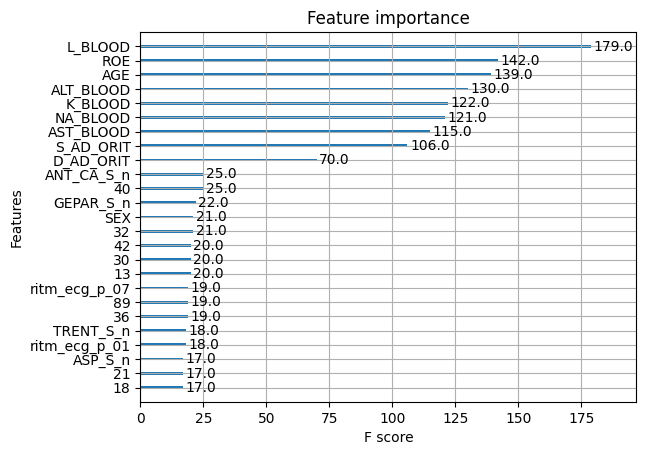

In [ ]:
# plot feature importance
model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model, max_num_features= 25)
pyplot.show()

In [ ]:
list_10 = [0,1,2,3,4,5,6,7,8,141]
X_train_important_10 = X_train[X_train.columns[list_10]]
X_test_important_10 = X_test[X_test.columns[list_10]]

In [ ]:
# 25 features
list_names_= ["ANT_CA_S_n","57","18","ASP_S_n","89","ritm_ecg_p_07","LID_S_n","1","90","16","11","SEX","13","42","GIPER_NA"]
list_25 =[]
for x in list_names_:
    a = X_train.columns.get_loc(x)
    list_25.append(a)
list_25 = list_10 + list_25
X_train_important_25 = X_train[X_train.columns[list_25]]
X_test_important_25 = X_test[X_test.columns[list_25]]

Hyperparameter tuning

In [ ]:
# 10 features
param_test1 = {
 'max_depth':range(3,25,1),
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train_important_10,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 6}, 0.6427023684166542)

In [ ]:
# 25 features
param_test1 = {
 'max_depth':range(3,25,1),
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train_important_25,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 6}, 0.651139480473896)

In [ ]:
# all features
param_test1 = {
 'max_depth':range(3,25,1),
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 24}, 0.7254206040245001)

 Predict

In [ ]:
model = XGBClassifier(max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# report metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F-measure:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6458333333333334
Precision: 0.671875
Recall: 0.6972972972972973
F-measure: 0.6843501326259946


NaiveBayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5804


After comparing 4 model we found random forest have highest accuracy. So we can conclude random forest is besty model for dataset

In [161]:
from pickle import dump

dump(clf_rf,open('myocardial_infraction_intell.pkl','wb'))